# Project Credit Card Approval Prediction

A project proposal to predict credit card approval involves using data analysis and machine learningtechniques to develop a predictive model that can determine the likelihood of an individual's credit cardapplication being approved or denied.

- The
proposed project
would have several key steps, including data collection and cleaning, exploratorydata analysis, feature engineering, model selection and training, and model evaluation and testing.

- The
end goal
of the project would be to develop a reliable and accurate model that could be used by creditcard companies to assess creditworthiness and make informed decisions about whether to approve or denyan applicant's credit card application.

**Columns in the dataset:**

Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size

### Importing all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#!pip install fancyimpute
import fancyimpute
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

Importing the datasets into python using pandas

In [11]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cap1/Credit_card.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cap1/Credit_card_label.csv")

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# merging both datasets into df dataset
df = pd.merge(df1,df2,on='Ind_ID')

Checking size of the dataset

In [14]:
df.shape

(1548, 19)

Observing the dataset for any unusual activity

In [15]:
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

- Observe null values in Annual_income, Type_Occupation columns and have to check other columns in the further analysis.

- Need to convert Birthday_count, Employed_days into years

In [16]:
df.tail()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0

In [17]:
df.info() # Getting basic information about columns and null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

1. There are missing values in the data
2. Type of Occupation has more number of missing values which might be people don't want to let their occupation to know.
- Data set has 8 Categorical Variables.
- Remaining 11 are Numerical Variables.

Creating a dataframe to understand number of and percentage of null values in the dataset.

In [18]:
missing =pd.DataFrame({'missing':df.isnull().sum(),
              'missing %':df.isnull().mean()*100})
missing

missing  missing %
Ind_ID                 0   0.000000
GENDER                 7   0.452196
Car_Owner              0   0.000000
Propert_Owner          0   0.000000
CHILDREN               0   0.000000
Annual_income         23   1.485788
Type_Income            0   0.000000
EDUCATION              0   0.000000
Marital_status         0   0.000000
Housing_type           0   0.000000
Birthday_count        22   1.421189
Employed_days          0   0.000000
Mobile_phone           0   0.000000
Work_Phone             0   0.000000
Phone                  0   0.000000
EMAIL_ID               0   0.000000
Type_Occupation      488  31.524548
Family_Members         0   0.000000
label                  0   0.000000

Getting statistical information about dataset.

In [19]:
df.describe(include = 'all')

Ind_ID GENDER Car_Owner Propert_Owner     CHILDREN  \
count   1.548000e+03   1541      1548          1548  1548.000000   
unique           NaN      2         2             2          NaN   
top              NaN      F         N             Y          NaN   
freq             NaN    973       924          1010          NaN   
mean    5.078920e+06    NaN       NaN           NaN     0.412791   
std     4.171759e+04    NaN       NaN           NaN     0.776691   
min     5.008827e+06    NaN       NaN           NaN     0.000000   
25%     5.045070e+06    NaN       NaN           NaN     0.000000   
50%     5.078842e+06    NaN       NaN           NaN     0.000000   
75%     5.115673e+06    NaN       NaN           NaN     1.000000   
max     5.150412e+06    NaN       NaN           NaN    14.000000   

        Annual_income Type_Income                      EDUCATION  \
count    1.525000e+03        1548                           1548   
unique            NaN           4                              5   
top               NaN     Working  Secondary / secondary special   
freq              NaN         798                           1031   
mean     1.913993e+05         NaN                            NaN   
std      1.132530e+05         NaN                            NaN   
min      3.375000e+04         NaN                            NaN   
25%      1.215000e+05         NaN                            NaN   
50%      1.665000e+05         NaN                            NaN   
75%      2.250000e+05         NaN                            NaN   
max      1.575000e+06         NaN                            NaN   

       Marital_status       Housing_type  Birthday_count  Employed_days  \
count            1548               1548     1526.000000    1548.000000   
unique              5                  6             NaN            NaN   
top           Married  House / apartment             NaN            NaN   
freq             1049               1380             NaN            NaN   
mean              NaN                NaN   -16040.342071   59364.689922   
std               NaN                NaN     4229.503202  137808.062701   
min               NaN                NaN   -24946.000000  -14887.000000   
25%               NaN                NaN   -19553.000000   -3174.500000   
50%               NaN                NaN   -15661.500000   -1565.000000   
75%               NaN                NaN   -12417.000000    -431.750000   
max               NaN                NaN    -7705.000000  365243.000000   

        Mobile_phone   Work_Phone        Phone     EMAIL_ID Type_Occupation  \
count         1548.0  1548.000000  1548.000000  1548.000000            1060   
unique           NaN          NaN          NaN          NaN              18   
top              NaN          NaN          NaN          NaN        Laborers   
freq             NaN          NaN          NaN          NaN             268   
mean             1.0     0.208010     0.309432     0.092377             NaN   
std              0.0     0.406015     0.462409     0.289651             NaN   
min              1.0     0.000000     0.000000     0.000000             NaN   
25%              1.0     0.000000     0.000000     0.000000             NaN   
50%              1.0     0.000000     0.000000     0.000000             NaN   
75%              1.0     0.000000     1.000000     0.000000             NaN   
max              1.0     1.000000     1.000000     1.000000             NaN   

        Family_Members        label  
count      1548.000000  1548.000000  
unique             NaN          NaN  
top                NaN          NaN  
freq               NaN          NaN  
mean          2.161499     0.113049  
std           0.947772     0.316755  
min           1.000000     0.000000  
25%           2.000000     0.000000  
50%           2.000000     0.000000  
75%           3.000000     0.000000  
max          15.000000     1.000000

In [20]:
df.duplicated().sum()

0

0 duplicate records in the dataset.

In [21]:
df.corr()['label']

Ind_ID            0.016796
CHILDREN         -0.021646
Annual_income     0.027456
Birthday_count   -0.045097
Employed_days     0.031408
Mobile_phone           NaN
Work_Phone       -0.007046
Phone            -0.000664
EMAIL_ID          0.012921
Family_Members   -0.030709
label             1.000000
Name: label, dtype: float64

# Data Cleaning

Dealing with missing values

In [22]:
credit_df = df.copy(deep = True) #copy df dataset into credit_df

Axes(0.125,0.11;0.775x0.77)


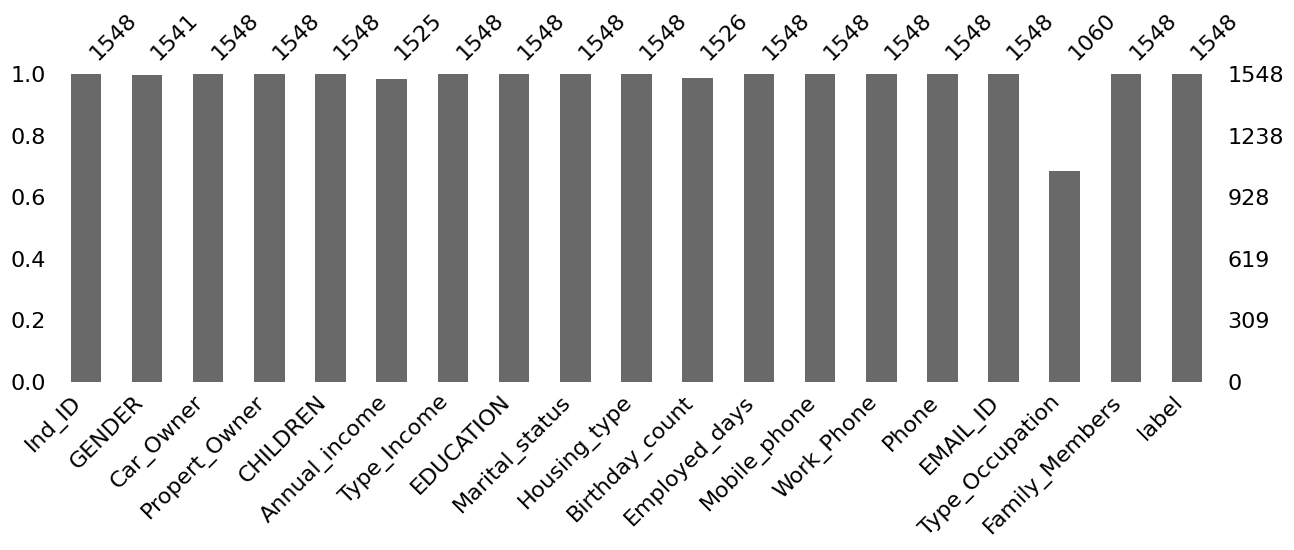

In [23]:
# Importing missingno module
import missingno as msno
print(msno.bar(credit_df, figsize = (15,4))) # shows bar graph of missing values wrt to each column.

<Axes: >

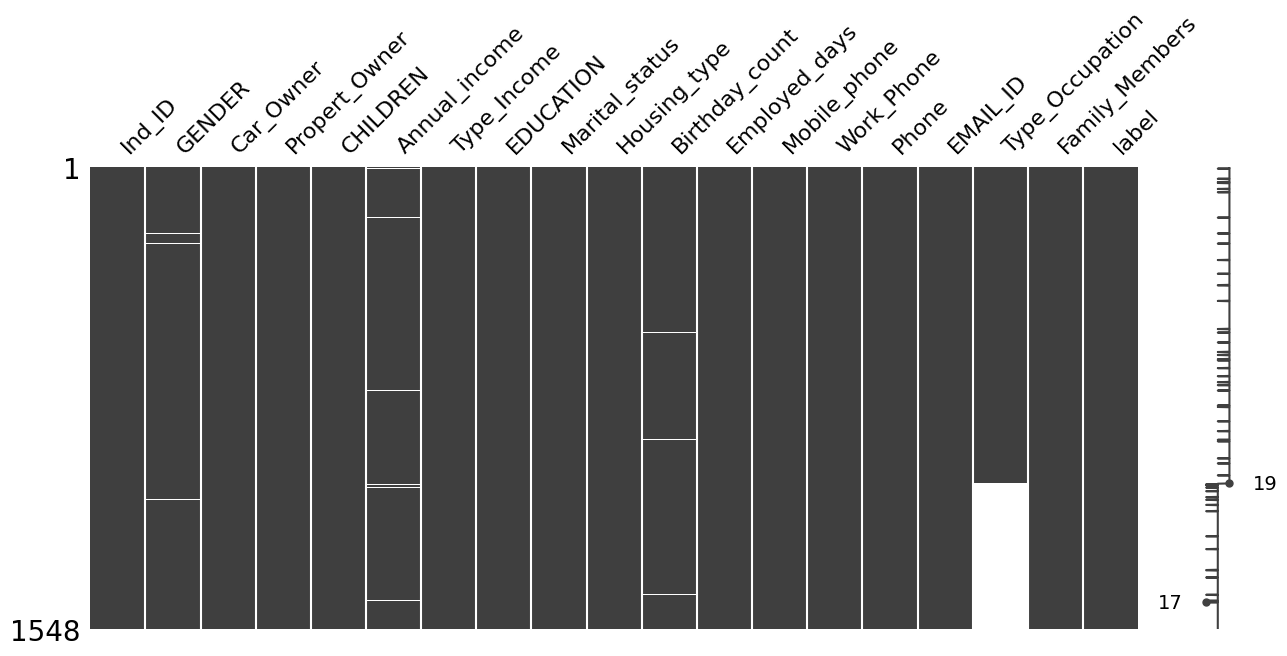

In [24]:
msno.matrix(credit_df.sort_values(by=['Type_Occupation']), figsize = (15,6)) # no relation of missing values with other missng values

- missing values in GENDER, Annual_income, Birthday_count with Type_Occupation is completely at random.

- missing values in GENDER, Annual_income, Birthday_count are less than 1%. Considering this, removing records of those missing values.

In [25]:
credit_df['Type_Occupation'].fillna('not specified', inplace = True) #filling missing values in type_occupation column

In [26]:
# Removing all the null values in the dataset
credit_df.dropna(inplace = True)
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1496 non-null   int64  
 1   GENDER           1496 non-null   object 
 2   Car_Owner        1496 non-null   object 
 3   Propert_Owner    1496 non-null   object 
 4   CHILDREN         1496 non-null   int64  
 5   Annual_income    1496 non-null   float64
 6   Type_Income      1496 non-null   object 
 7   EDUCATION        1496 non-null   object 
 8   Marital_status   1496 non-null   object 
 9   Housing_type     1496 non-null   object 
 10  Birthday_count   1496 non-null   float64
 11  Employed_days    1496 non-null   int64  
 12  Mobile_phone     1496 non-null   int64  
 13  Work_Phone       1496 non-null   int64  
 14  Phone            1496 non-null   int64  
 15  EMAIL_ID         1496 non-null   int64  
 16  Type_Occupation  1496 non-null   object 
 17  Family_Members

- Now, the data set is with 1496 records

Converting Birthday_count, Employed_days into years.

In [27]:
credit_df['Birthday_count'] = abs(credit_df['Birthday_count']/365)
credit_df['Birthday_count'] = credit_df['Birthday_count'].round()

In [28]:
credit_df['Employed_days'] = abs(credit_df['Employed_days']/365)
credit_df['Employed_days'] = credit_df['Employed_days'].round(1)

Renaming all the column names.

In [29]:
credit_df.rename(columns = {"Ind_ID" : 'id',
                             "GENDER" : 'gender',
                             "Car_Owner" : 'own_car',
                             "Propert_Owner" : 'own_property',
                             "CHILDREN" : 'child_count',
                             "Annual_income" : 'income',
                             "Type_Income" : 'type_income',
                             "EDUCATION" : 'education_level',
                            'Marital_status' : 'marital_status',
                            'Housing_type' : 'housing_type',
                             "Birthday_count" : 'age',
                             "Employed_days" : 'experience',
                            'Mobile_phone' : 'mobile_phone',
                            'Work_Phone' : 'work_phone',
                            'Phone' : 'phone',
                            'EMAIL_ID' : 'email_id',
                            'Type_Occupation' : 'type_occupation',
                            'Family_Members' : 'family_members'
                             },inplace = True)

### Encoding categorical variables

In [30]:
credit_df1 = credit_df.copy(deep = True) #copy credit_df dataset into credit_df1

In [31]:
credit_df1.head(3)

id gender own_car own_property  child_count    income  \
0  5008827      M       Y            Y            0  180000.0   
1  5009744      F       Y            N            0  315000.0   
4  5009752      F       Y            N            0  315000.0   

            type_income   education_level marital_status       housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

    age  experience  mobile_phone  work_phone  phone  email_id  \
0  51.0      1000.7             1           0      0         0   
1  37.0         1.6             1           1      1         0   
4  37.0         1.6             1           1      1         0   

  type_occupation  family_members  label  
0   not specified               2      1  
1   not specified               2      1  
4   not specified               2      1

Dealing with unusual records in the experience column.

- Applying imputation techniques to make the experience data normal.

In [32]:
credit_df1['experience'].replace(1000.70,np.NaN,inplace=True) #replaceing all the extreme values to null values

In [33]:
# checking all the categories in the categorical columns
cat = credit_df1[['type_income','education_level','marital_status','housing_type','type_occupation']]
for i in cat:
  print(i,cat[i].unique())
  print('-' * 50)

type_income ['Pensioner' 'Commercial associate' 'Working' 'State servant']
--------------------------------------------------
education_level ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
--------------------------------------------------
marital_status ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
--------------------------------------------------
housing_type ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
--------------------------------------------------
type_occupation ['not specified' 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff'
 'Accountants' 'Managers' 'Cleaning staff' 'Drivers' 'Low-skill Laborers'
 'High skill tech staff' 'IT staff' 'Waiters/barmen staff'
 'Security staff' 'Medicine staff' 'Private service staff' 'HR staff'
 'Secretaries' 'Realty agents']
--------------------------------------------------


In [34]:
# Converting Gender, Car, Property into Numerical Data
credit_df1['gender'].replace('M',0,inplace=True)
credit_df1['gender'].replace('F',1,inplace=True)
credit_df1['own_car'].replace('Y',0,inplace=True)
credit_df1['own_car'].replace('N',1,inplace=True)
credit_df1['own_property'].replace('Y',0,inplace=True)
credit_df1['own_property'].replace('N',1,inplace=True)

In [35]:
le1 = LabelEncoder()  # create a LabelEncoder object
credit_df1['type_income_encoded'] = le1.fit_transform(credit_df1['type_income'])  # fit and transform the Type_Income column
credit_df1.drop('type_income', axis=1, inplace=True)  # Drop the original Type_Income column

le2 = LabelEncoder()  # create a LabelEncoder object
credit_df1['housing_type_encoded'] = le2.fit_transform(credit_df1['housing_type'])  # fit and transform the Type_Income column
credit_df1.drop('housing_type', axis=1, inplace=True)  # Drop the original Type_Income column

le3 = LabelEncoder()  # create a LabelEncoder object
credit_df1['type_occupation_encoded'] = le2.fit_transform(credit_df1['type_occupation'])  # fit and transform the Type_Income column
credit_df1.drop('type_occupation', axis=1, inplace=True)  # Drop the original Type_Income column

In [36]:
# create an instance of the encoder
encoder = OrdinalEncoder(categories=[['Lower secondary', 'Incomplete higher', 'Secondary / secondary special', 'Higher education', 'Academic degree']])
# encode the Education_Level feature
credit_df1['education_level_encoded'] = encoder.fit_transform(credit_df1[['education_level']])
credit_df1.drop('education_level', axis=1, inplace=True)  # drop the original Education_Level column


credit_df1['marital_status'].replace('Civil marriage',"Married",inplace=True)
credit_df1['marital_status'].replace('Widow',"Separated",inplace=True)
credit_df1['marital_status'].replace("Single / not married","Single",inplace=True)

encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False, drop= "first")
# Select the column to be encoded
marital_status = credit_df1[['marital_status']]

# Fit and transform the data using the encoder
marital_encoded_df = pd.DataFrame(encoder.fit_transform(marital_status), columns=["Married","Separated"],dtype=int)

# Concatenate the encoded data with the original dataframe
credit_df1 = pd.concat([credit_df1, marital_encoded_df], axis=1)

# Drop the original column that was encoded
credit_df1.drop(['marital_status'], axis=1, inplace=True)

In [37]:
credit_df1.head(2) #Confirming all the columns encoded or not

id  gender  own_car  own_property  child_count    income   age  \
0  5008827.0     0.0      0.0           0.0          0.0  180000.0  51.0   
1  5009744.0     1.0      0.0           1.0          0.0  315000.0  37.0   

   experience  mobile_phone  work_phone  phone  email_id  family_members  \
0         NaN           1.0         0.0    0.0       0.0             2.0   
1         1.6           1.0         1.0    1.0       0.0             2.0   

   label  type_income_encoded  housing_type_encoded  type_occupation_encoded  \
0    1.0                  1.0                   1.0                     18.0   
1    1.0                  0.0                   1.0                     18.0   

   education_level_encoded  Married  Separated  
0                      3.0      0.0        0.0  
1                      3.0      0.0        0.0

Performing imputation techniques to experience column

Imputing row 1/1546 with 1 missing, elapsed time: 0.532
Imputing row 101/1546 with 1 missing, elapsed time: 0.534
Imputing row 201/1546 with 0 missing, elapsed time: 0.535
Imputing row 301/1546 with 0 missing, elapsed time: 0.537
Imputing row 401/1546 with 1 missing, elapsed time: 0.538
Imputing row 501/1546 with 0 missing, elapsed time: 0.539
Imputing row 601/1546 with 0 missing, elapsed time: 0.540
Imputing row 701/1546 with 0 missing, elapsed time: 0.541
Imputing row 801/1546 with 0 missing, elapsed time: 0.543
Imputing row 901/1546 with 1 missing, elapsed time: 0.544
Imputing row 1001/1546 with 0 missing, elapsed time: 0.546
Imputing row 1101/1546 with 0 missing, elapsed time: 0.547
Imputing row 1201/1546 with 0 missing, elapsed time: 0.548
Imputing row 1301/1546 with 1 missing, elapsed time: 0.550
Imputing row 1401/1546 with 1 missing, elapsed time: 0.551
Imputing row 1501/1546 with 18 missing, elapsed time: 0.555


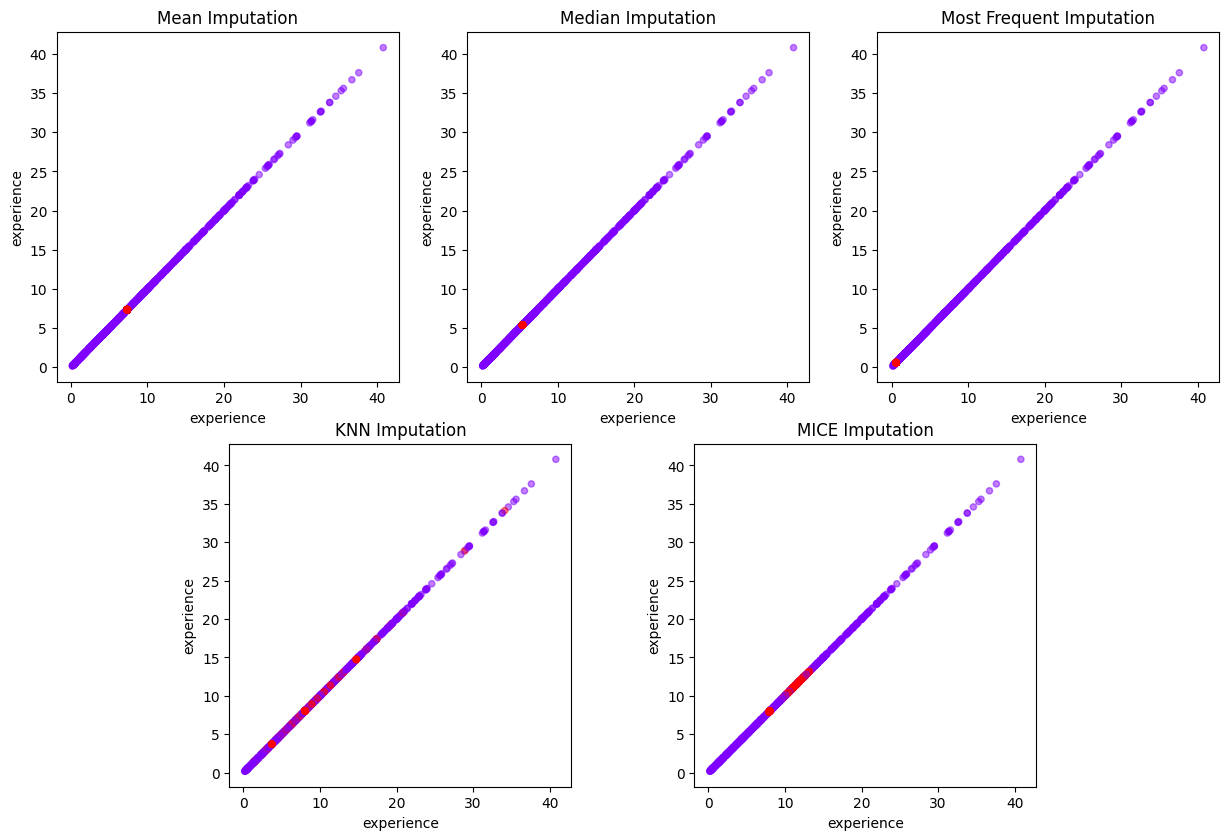

In [38]:
#Mean Imputation
from sklearn.impute import SimpleImputer
credit_mean = credit_df1.copy(deep = True)
mean_imputer = SimpleImputer(strategy="mean")
credit_mean.iloc[:,:] = mean_imputer.fit_transform(credit_mean)

#Median Imputation
credit_median = credit_df1.copy(deep = True)
median_imputer = SimpleImputer(strategy="median")
credit_median.iloc[:,:] = median_imputer.fit_transform(credit_median)
credit_median

#Mode Imputation
credit_mode = credit_df1.copy(deep = True)
mode_imputer = SimpleImputer(strategy="most_frequent")
credit_mode.iloc[:,:] = mode_imputer.fit_transform(credit_mode)
credit_mode

#KNN imputation
from fancyimpute import KNN
knn_imputer = KNN()
credit_knn = credit_df1.copy(deep = True)
credit_knn.iloc[:,:] = knn_imputer.fit_transform(credit_knn)
credit_knn

# MICE Imputation
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
credit_MICE = credit_df1.copy(deep=True)
credit_MICE.iloc[:, :] = MICE_imputer.fit_transform(credit_MICE)

fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])
nullity = credit_df1['experience'].isnull() + credit_df1['experience'].isnull()
imputations = {'Mean Imputation': credit_mean,
               'Median Imputation': credit_median,
               'Most Frequent Imputation': credit_mode,
               'KNN Imputation': credit_knn,
              'MICE Imputation': credit_MICE}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='experience',y="experience",kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)
plt.show()

Considering KNN imputer for experience column.KNN imputation works the best out of all.

In [39]:
# Taking our imputed Employed_Years Column to the Main DataFrame
credit_df2 = credit_knn.copy(deep = True) #copying credit_knn to new dataset called credit_df1
credit_df2 = credit_df2.rename(columns = {'experience':'experience_yrs'}) #renaming experience column
credit_copy = credit_df2[['id','experience_yrs']]

# Creating new Dataframe sql_data and merging columns into it to perform querying in MySQL.
sql_data = pd.merge(credit_df, credit_copy, how = 'inner', on = ['id'])
sql_data = sql_data.drop('experience', axis = 1)
sql_data.set_index('id', inplace= True)

- credit_df2 is cleaned numerical data

- sql_data is cleaned original data(numerical + categorical)

Saving data to CSV file, so that we can get insights from querying in MySQL

In [40]:
credit_data = pd.DataFrame(sql_data)

In [41]:
#credit_sql.to_excel('credit_sql.xlsx', index = True)
credit_data.to_csv('credit_sql.csv', index = True)

## Exploratory Data Analysis

In [42]:
credit_data.head(10) #Observing dataset

gender own_car own_property  child_count    income  \
id                                                           
5008827      M       Y            Y            0  180000.0   
5009744      F       Y            N            0  315000.0   
5009752      F       Y            N            0  315000.0   
5009754      F       Y            N            0  315000.0   
5009894      F       N            N            0  180000.0   
5010864      M       Y            Y            1  450000.0   
5010868      M       Y            Y            1  450000.0   
5010869      M       Y            Y            1  450000.0   
5018498      F       Y            Y            0   90000.0   
5018503      F       Y            Y            0   90000.0   

                  type_income                education_level  \
id                                                             
5008827             Pensioner               Higher education   
5009744  Commercial associate               Higher education   
5009752  Commercial associate               Higher education   
5009754  Commercial associate               Higher education   
5009894             Pensioner  Secondary / secondary special   
5010864  Commercial associate  Secondary / secondary special   
5010868             Pensioner  Secondary / secondary special   
5010869  Commercial associate  Secondary / secondary special   
5018498               Working  Secondary / secondary special   
5018503               Working  Secondary / secondary special   

               marital_status       housing_type   age  mobile_phone  \
id                                                                     
5008827               Married  House / apartment  51.0             1   
5009744               Married  House / apartment  37.0             1   
5009752               Married  House / apartment  37.0             1   
5009754               Married  House / apartment  37.0             1   
5009894               Married  House / apartment  61.0             1   
5010864               Married  House / apartment  50.0             1   
5010868               Married  House / apartment  50.0             1   
5010869  Single / not married  House / apartment  50.0             1   
5018498               Married  House / apartment  52.0             1   
5018503               Married  House / apartment  52.0             1   

         work_phone  phone  email_id type_occupation  family_members  label  \
id                                                                            
5008827           0      0         0   not specified               2      1   
5009744           1      1         0   not specified               2      1   
5009752           1      1         0   not specified               2      1   
5009754           1      1         0   not specified               2      1   
5009894           0      0         0   not specified               2      1   
5010864           0      1         1      Core staff               3      1   
5010868           0      1         1      Core staff               3      1   
5010869           0      1         1      Core staff               1      1   
5018498           1      1         0   Cooking staff               2      1   
5018503           1      1         0   Cooking staff               2      1   

         experience_yrs  
id                       
5008827        6.814302  
5009744        1.600000  
5009752        1.600000  
5009754        1.600000  
5009894        3.211111  
5010864        1.900000  
5010868        1.900000  
5010869        1.900000  
5018498        2.700000  
5018503        2.700000

In [43]:
# Creating a user defined function to get information about categorical columns
def category_info(credit_data, column):
  total = credit_data[column].count()
  cat_count = credit_data[column].value_counts()
  cat_percentage = (cat_count/total) * 100
  cat_info = pd.concat([cat_count, cat_percentage], axis = 1)
  cat_info.columns = ['category_count','category_percentage']
  return cat_info

## Univariate Analysis

### Gender

In [44]:
credit_data['gender'].describe()

count     1496
unique       2
top          F
freq       947
Name: gender, dtype: object

In [45]:
category_info(credit_data, 'gender')

category_count  category_percentage
F             947            63.302139
M             549            36.697861

<Axes: xlabel='gender', ylabel='count'>

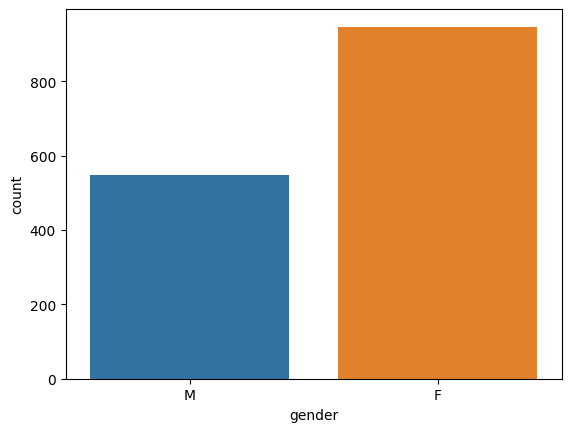

In [46]:
sns.countplot(data=credit_data, x='gender')

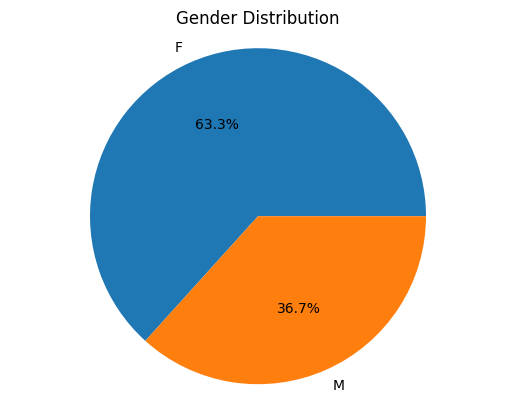

In [47]:
# Group the data by gender and count the number of occurrences
gender_count = credit_data.groupby('gender')['gender'].count()

# Create a pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

- more female applicants than male ( 63.3% : 36.7% )

### Car_Owner

In [48]:
category_info(credit_data, 'own_car')

category_count  category_percentage
N             898            60.026738
Y             598            39.973262

<Axes: xlabel='own_car', ylabel='count'>

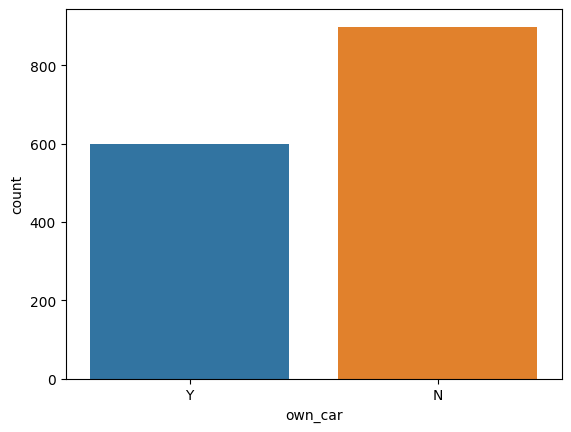

In [49]:
sns.countplot(data=credit_data, x='own_car')

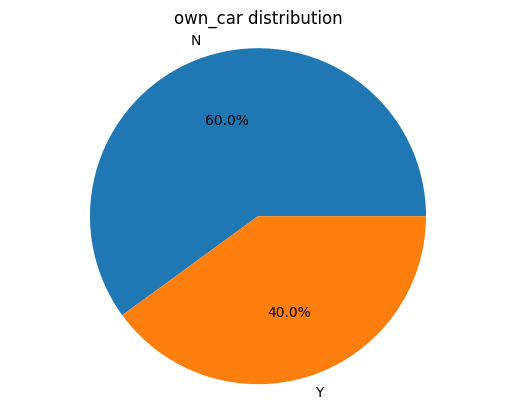

In [50]:
# Group the data by own_car and count the number of occurrences
gender_count = credit_data.groupby('own_car')['own_car'].count()

# Create a pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('own_car distribution')
plt.axis('equal')
plt.show()

- Most applicants do not have a car.

### Property Owner

In [51]:
category_info(credit_data, 'own_property')

category_count  category_percentage
Y             977            65.307487
N             519            34.692513

<Axes: xlabel='own_property', ylabel='count'>

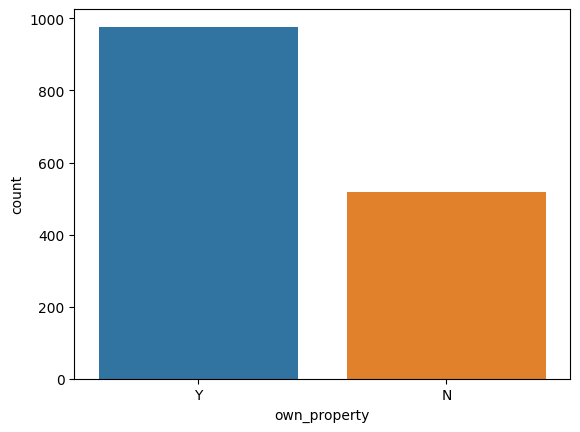

In [52]:
sns.countplot(data=credit_data, x='own_property')

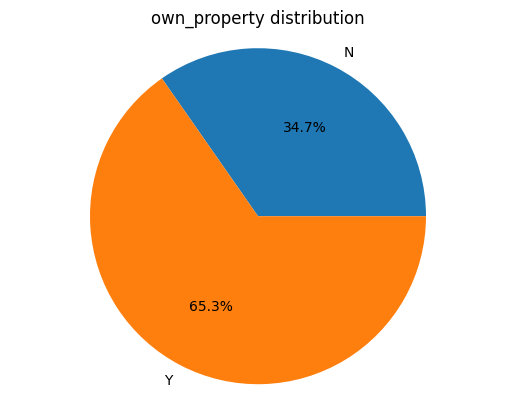

In [53]:
# Group the data by own_property and count the number of occurrences
gender_count = credit_data.groupby('own_property')['own_property'].count()

# Create a pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('own_property distribution')
plt.axis('equal')
plt.show()

- 65.3% of the applicants are having Own Property

### Type Income

In [54]:
category_info(credit_data, 'type_income')

category_count  category_percentage
Working                          769            51.403743
Commercial associate             353            23.596257
Pensioner                        259            17.312834
State servant                    115             7.687166

<Axes: xlabel='type_income', ylabel='count'>

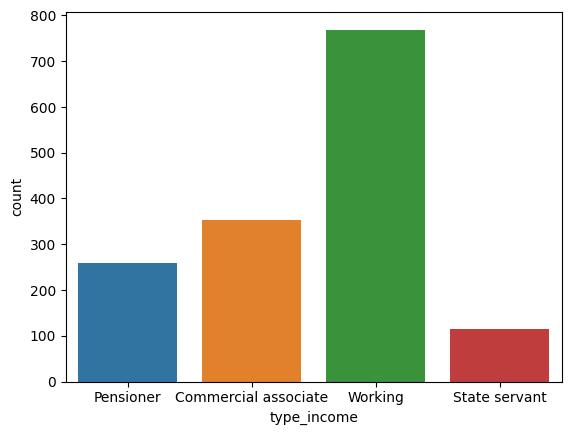

In [55]:
sns.countplot(data=credit_data, x='type_income')

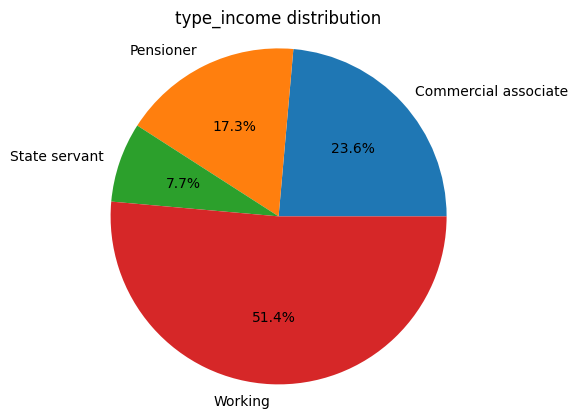

In [56]:
# Group the data by type_income and count the number of occurrences
gender_count = credit_data.groupby('type_income')['type_income'].count()

# Create a pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('type_income distribution')
plt.axis('equal')
plt.show()

- Half of the applicants (51.4%) are Working Professionals

### Education

In [57]:
category_info(credit_data, 'education_level')

category_count  category_percentage
Secondary / secondary special             998            66.711230
Higher education                          409            27.339572
Incomplete higher                          66             4.411765
Lower secondary                            21             1.403743
Academic degree                             2             0.133690

In [58]:
fig = px.histogram(credit_data, x="education_level", color="education_level",
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   title="education_level distribution", width=800, height=400)
fig.update_layout(xaxis_title="education_level", yaxis_title="Count")
fig.show()

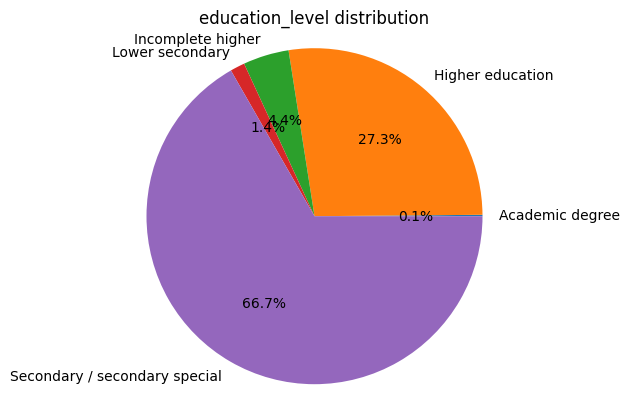

In [59]:
# Group the data by education_level and count the number of occurrences
gender_count = credit_data.groupby('education_level')['education_level'].count()

# Create a pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('education_level distribution')
plt.axis('equal')
plt.show()

- Applicants of Secondary/ Secondary special are greater the Applicants of Academic degree and Higher Education.

- Both Academic degree and Higher education applicants are about 27.4%

### Marital Status

In [60]:
category_info(credit_data, 'marital_status')

category_count  category_percentage
Married                         1011            67.580214
Single / not married             218            14.572193
Civil marriage                   101             6.751337
Separated                         91             6.082888
Widow                             75             5.013369

In [61]:
fig = px.histogram(credit_data, x="marital_status", color="marital_status",
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   title="marital_status distribution", width=800, height=400)
fig.update_layout(xaxis_title="marital_status", yaxis_title="Count")
fig.show()

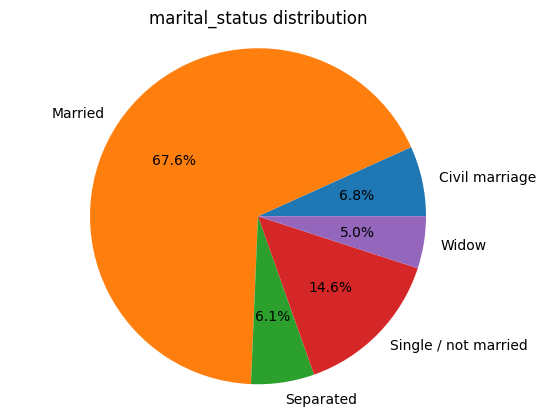

In [62]:
# Group the data by marital_status and count the number of occurrences
gender_count = credit_data.groupby('marital_status')['marital_status'].count()

# Create a pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('marital_status distribution')
plt.axis('equal')
plt.show()

- Most of the applicants are married.

- Applicants of separated are higher than the applicants who are widow. seems like widow applicants are low risk than those who are separated.

### Housing Type

In [63]:
category_info(credit_data, 'housing_type')

category_count  category_percentage
House / apartment              1331            88.970588
With parents                     79             5.280749
Municipal apartment              51             3.409091
Rented apartment                 21             1.403743
Office apartment                  9             0.601604
Co-op apartment                   5             0.334225

In [64]:
fig = px.histogram(credit_data, x="housing_type", color="housing_type",
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   title="housing_type distribution", width=800, height=400)
fig.update_layout(xaxis_title="housing_type", yaxis_title="Count")
fig.show()

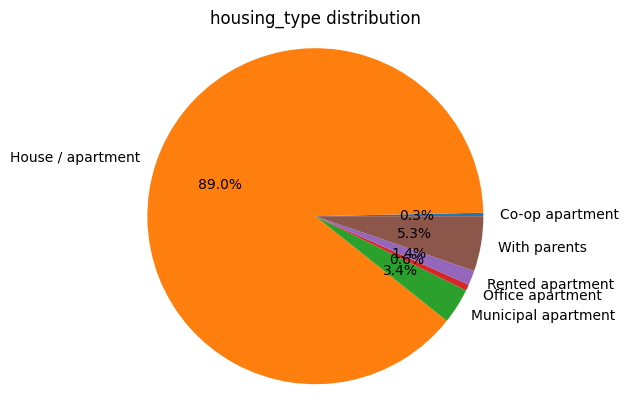

In [65]:
# Group the data by housing_type and count the number of occurrences
gender_count = credit_data.groupby('housing_type')['housing_type'].count()

# Create a pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('housing_type distribution')
plt.axis('equal')
plt.show()

- Most of the applicants are living in House/apartment.

### Type Occupation

In [66]:
category_info(credit_data, 'type_occupation')

category_count  category_percentage
not specified                     471            31.483957
Laborers                          259            17.312834
Core staff                        171            11.430481
Managers                          130             8.689840
Sales staff                       118             7.887701
Drivers                            85             5.681818
High skill tech staff              62             4.144385
Medicine staff                     49             3.275401
Accountants                        42             2.807487
Security staff                     24             1.604278
Cleaning staff                     20             1.336898
Cooking staff                      19             1.270053
Private service staff              16             1.069519
Secretaries                         9             0.601604
Low-skill Laborers                  9             0.601604
Waiters/barmen staff                5             0.334225
HR staff                            3             0.200535
IT staff                            2             0.133690
Realty agents                       2             0.133690

In [67]:
fig = px.histogram(credit_data, x="type_occupation", color="type_occupation",
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   title="type_occupation distribution", width=800, height=400)
fig.update_layout(xaxis_title="type_occupation", yaxis_title="Count")
fig.show()

In [68]:
fig = px.pie(credit_data, names='type_occupation', width=800, height=400)
fig.show()

- 31.5% of applicants do not want to disclose their type of occupation. (missing data)

- Other than not specified category, most of the applicants are Laborers, core staff and managers.

### Children

In [69]:
credit_data["child_count"].describe()

count    1496.000000
mean        0.415775
std         0.780784
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: child_count, dtype: float64

In [70]:
category_info(credit_data, 'child_count')

category_count  category_percentage
0             1051            70.254011
1              298            19.919786
2              129             8.622995
3               16             1.069519
4                1             0.066845
14               1             0.066845

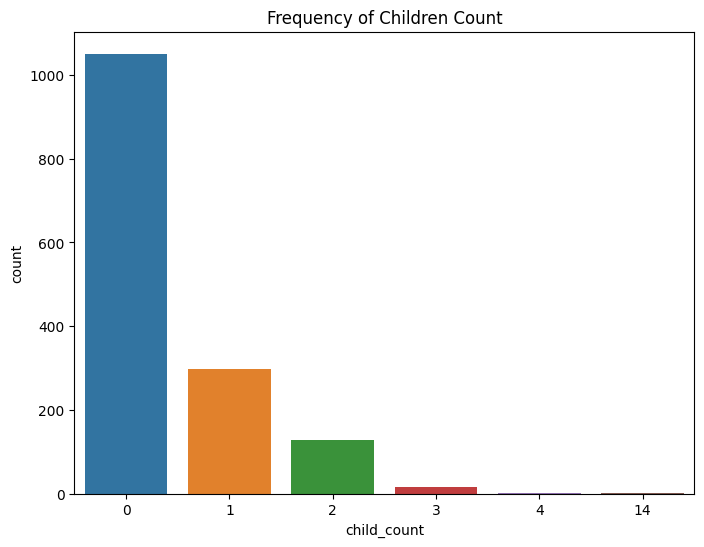

In [71]:
plt.figure(figsize=(8,6))
sns.countplot(x='child_count', data=credit_data)
plt.title('Frequency of Children Count')
plt.show()

In [72]:
# create a box plot for the experience column
fig = px.box(credit_data, y="child_count", title="Box Plot of Children Count",width=800, height=400)

# show the plot
fig.show()

- Most of the applicants (70%) are having 0 child.

- Observe the applicant with extreme child count as 14 must be an outlier.

### Annual Income

In [73]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
credit_data["income"].describe()

count      1496.00
mean     190775.05
std      113138.37
min       33750.00
25%      121050.00
50%      166050.00
75%      225000.00
max     1575000.00
Name: income, dtype: float64

In [74]:
# create a box plot for the experience column
fig = px.box(credit_data, y="income", title="Box Plot of income",width=800, height=400)

# show the plot
fig.show()

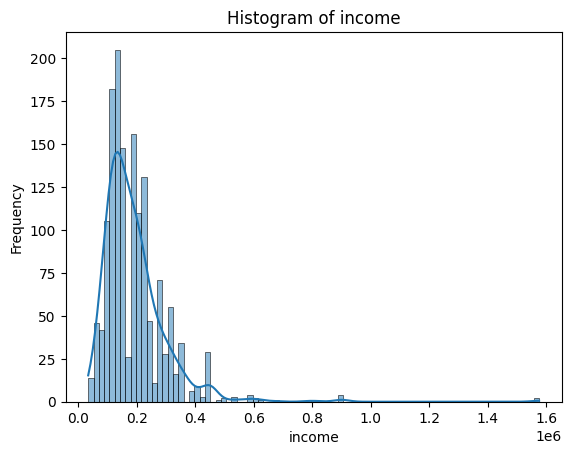

In [75]:
# Create histogram for income column
sns.histplot(data=credit_data, x='income', kde=True)
plt.title('Histogram of income')
plt.xlabel('income')
plt.ylabel('Frequency')
plt.show()

Bivariate analysis with Outcome variable

In [76]:
# create a box plot for the experience column
fig = px.box(credit_data,x = 'label', y="income",color = 'label', title="income vs label",width=800, height=400)

# show the plot
fig.show()

- Average income of the applicants is 190775.05 but this is with outliers. Without outliers average income is 166050.

- one applicant with income 1.575 million.

- The distribution of the income column is positively skewed.

### AGE

In [77]:
# create a box plot for the experience column
fig = px.box(credit_data, y="age", title="Age Distribution",width=800, height=400)

# show the plot
fig.show()

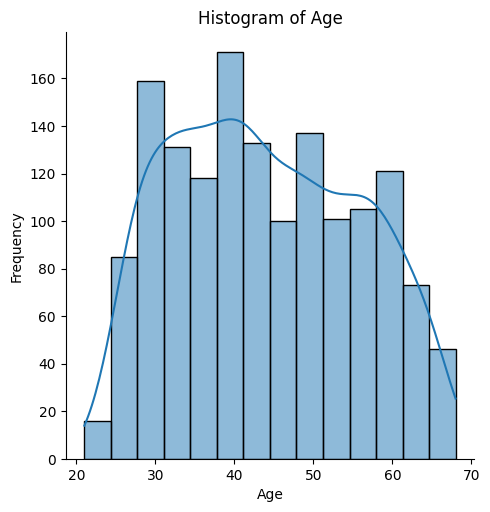

In [78]:
# Create histogram for age column
sns.displot(data=credit_data, x='age', kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Bivariate analysis with Outcome variable

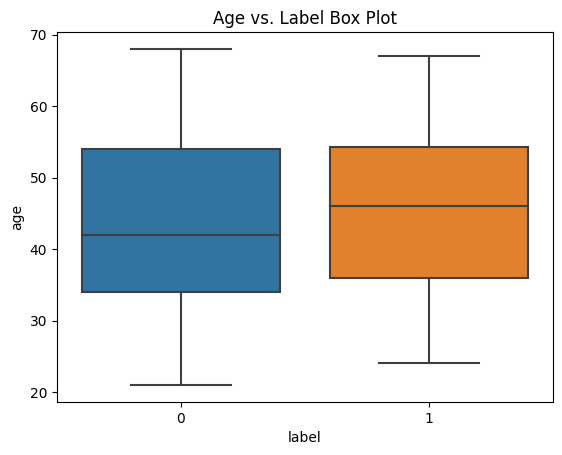

In [79]:
sns.boxplot(x='label', y='age', data=credit_data)
plt.title('Age vs. Label Box Plot')
plt.show()

- The youngest applicant is 21 years old and oldest applicant is 68 years old.

- The distribution of age column is not normally distributed, slightly positively skewed.

### Experience

In [80]:
credit_data["experience_yrs"].describe()

count   1496.00
mean       7.34
std        6.38
min        0.20
25%        2.80
50%        5.65
75%        9.70
max       40.80
Name: experience_yrs, dtype: float64

In [81]:
# create a box plot for the experience column
fig = px.box(credit_data, y="experience_yrs", title="Experience Box Plot",width=800, height=400)

# show the plot
fig.show()

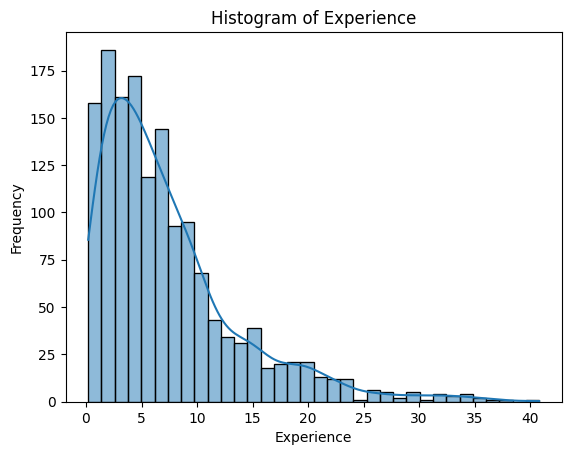

In [82]:
# Create histogram for experience column
sns.histplot(data=credit_data, x='experience_yrs', kde=True)
plt.title('Histogram of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()

In [83]:
# create a box plot for the experience column
fig = px.box(credit_data,x = 'label', y="experience_yrs",color = 'label', title="label vs experience_yrs",width=800, height=400)

# show the plot
fig.show()

- Most of the applicants have been working for 3 to 6 years.

- Data set having outliers from 20 and above.

- The data is positively skewed.

### Mobile Phone

In [84]:
category_info(credit_data, 'mobile_phone')

category_count  category_percentage
1            1496               100.00

### Work Phone

In [85]:
category_info(credit_data, 'work_phone')

category_count  category_percentage
0            1188                79.41
1             308                20.59

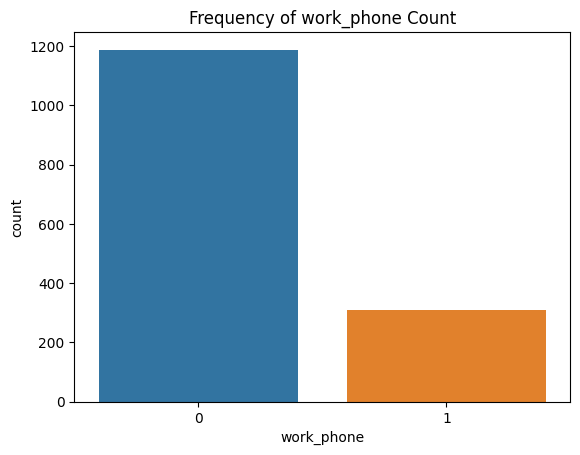

In [86]:
sns.countplot(x='work_phone', data=credit_data)
plt.title('Frequency of work_phone Count')
plt.show()

- 80% approx. applicants have a work phone.

### Mobile phone

In [87]:
category_info(credit_data, 'mobile_phone')

category_count  category_percentage
1            1496               100.00

All applicants have a mobile phone.

### Phone

In [88]:
category_info(credit_data, 'phone')

category_count  category_percentage
0            1040                69.52
1             456                30.48

In [89]:
fig = px.histogram(data_frame=credit_data, x='phone', color='phone', barmode='group', width=800, height=400)
fig.show()

- Most applicants do not have a phone.

### Email ID

In [90]:
category_info(credit_data, 'email_id')

category_count  category_percentage
0            1355                90.57
1             141                 9.43

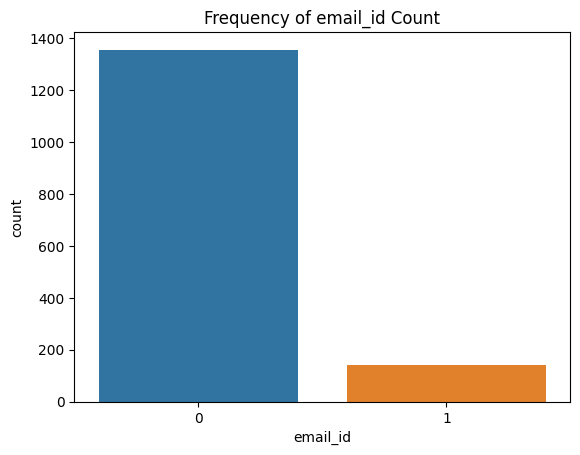

In [91]:
sns.countplot(x='email_id', data=credit_data)
plt.title('Frequency of email_id Count')
plt.show()

- 90% of the applicants have an email.

### Family Members

In [92]:
category_info(credit_data, 'family_members')

category_count  category_percentage
2              773                51.67
1              322                21.52
3              261                17.45
4              123                 8.22
5               15                 1.00
6                1                 0.07
15               1                 0.07

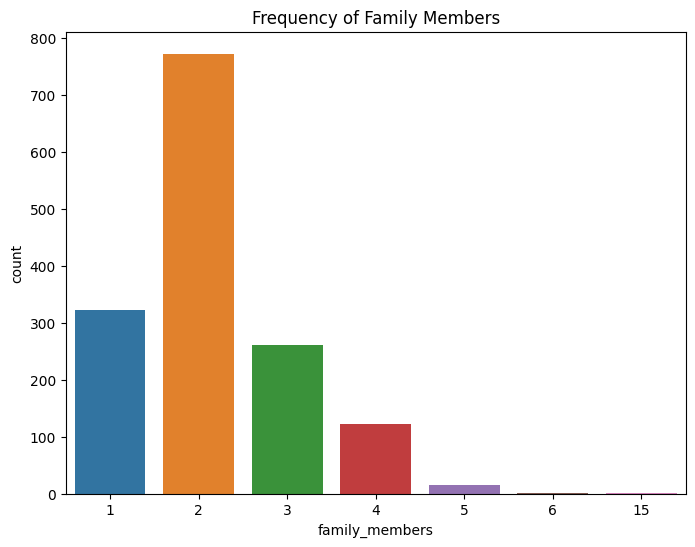

In [93]:
plt.figure(figsize=(8,6))
sns.countplot(x='family_members', data=credit_data)
plt.title('Frequency of Family Members')
plt.show()

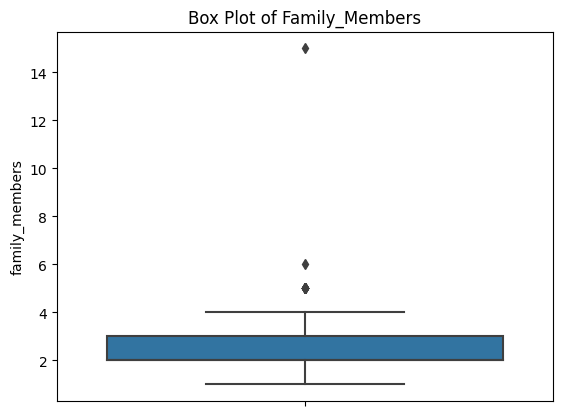

In [94]:
# Create box plot for Family_Members column
sns.boxplot(data=credit_data, y='family_members')
plt.title('Box Plot of Family_Members')
plt.show()

- Most applicants are 2 people in their house. It is also confirmed that the most of the applicants do not have a child.

- Extreme value in the distribution is 15 which can be considered as an outlier.

### Label

In [95]:
category_info(credit_data, 'label')

category_count  category_percentage
0            1336                89.30
1             160                10.70

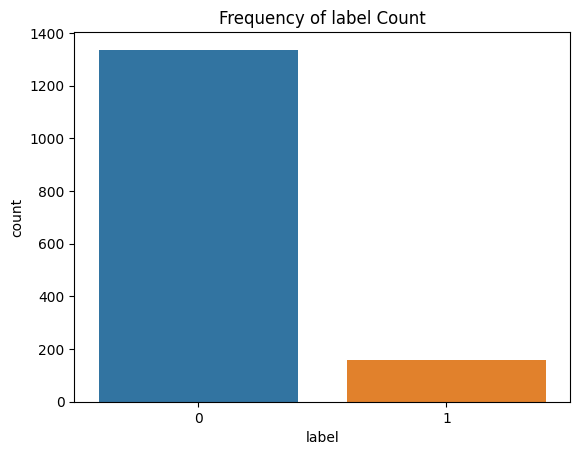

In [96]:
sns.countplot(x='label', data=credit_data)
plt.title('Frequency of label Count')
plt.show()

- 89% applicants applications have been approved for credit cards.

- the data distribution is not balanced.

## Bivariate Analysis

- Bivariate Analysis with target variable(label)

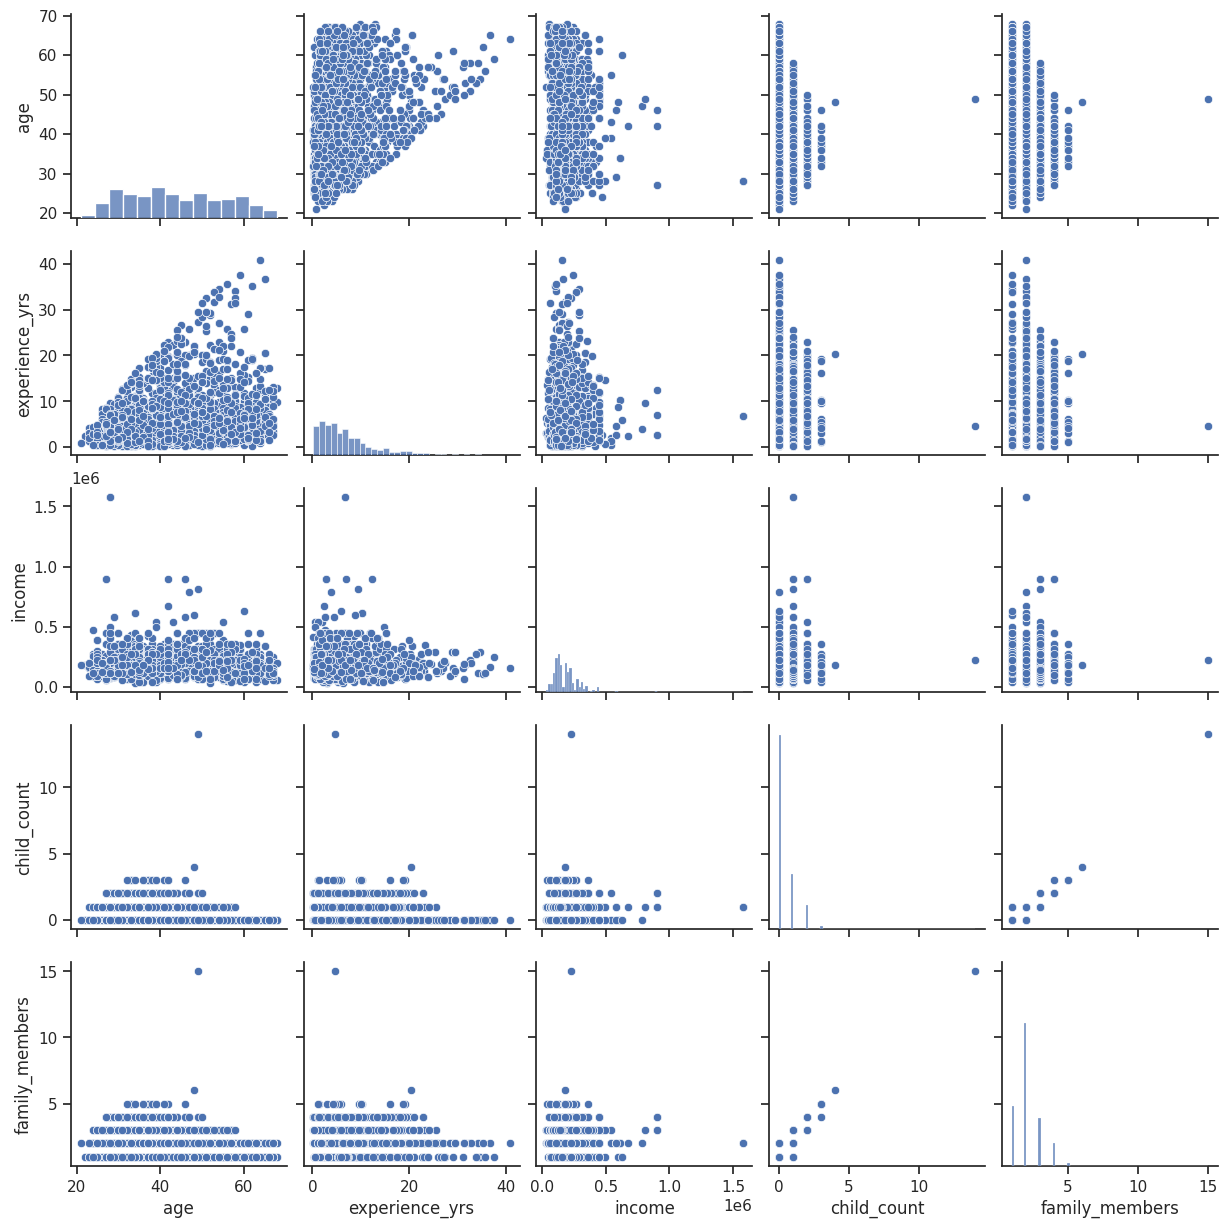

In [97]:
numerical_cols = ['age', 'experience_yrs', 'income','child_count','family_members']

# Create a scatter matrix
sns.set_theme(style="ticks")
sns.pairplot(credit_data[numerical_cols])

- There is a positive linear correlation between family member and child count. This makes sense because the more the children in the family, the larger the family members count. This is a multicollinear issue. which means the features are highly correlated. so, one of the features should be dropped.

- Another trend is betweeen experience and age. This is also makes sense because the longer the employee has been working, the older they are in the age.

- regression line between child_count vs family_members

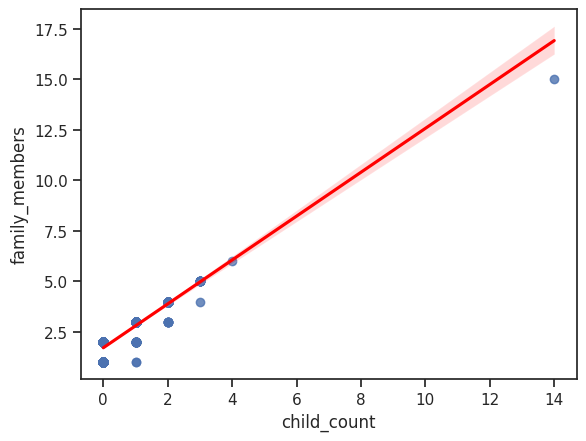

In [98]:
sns.regplot(data=credit_data, x='child_count',y='family_members', line_kws={'color': 'red'})
plt.show()

- regression line between experience_yrs vs age

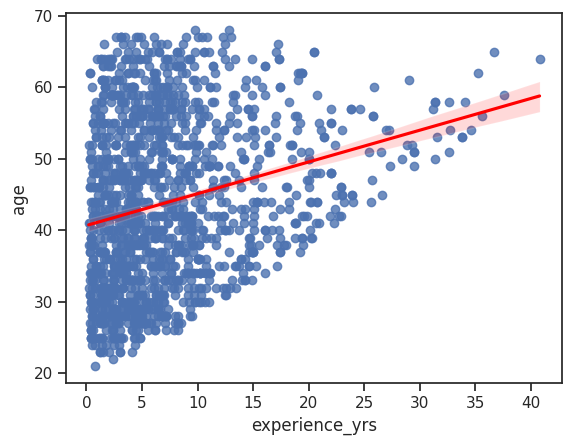

In [99]:
sns.regplot(data=credit_data, x='experience_yrs',y='age', line_kws={'color': 'red'})
plt.show()

- plot shows correlation between age and experience.

- the age of applicants increase with experience, that is why the shape of the plot would be like that. No one cannot have experience > age.

## Correlation Analysis

In [100]:
# change the datatype of target feature to int
label_int = credit_data['label'].astype('int32')

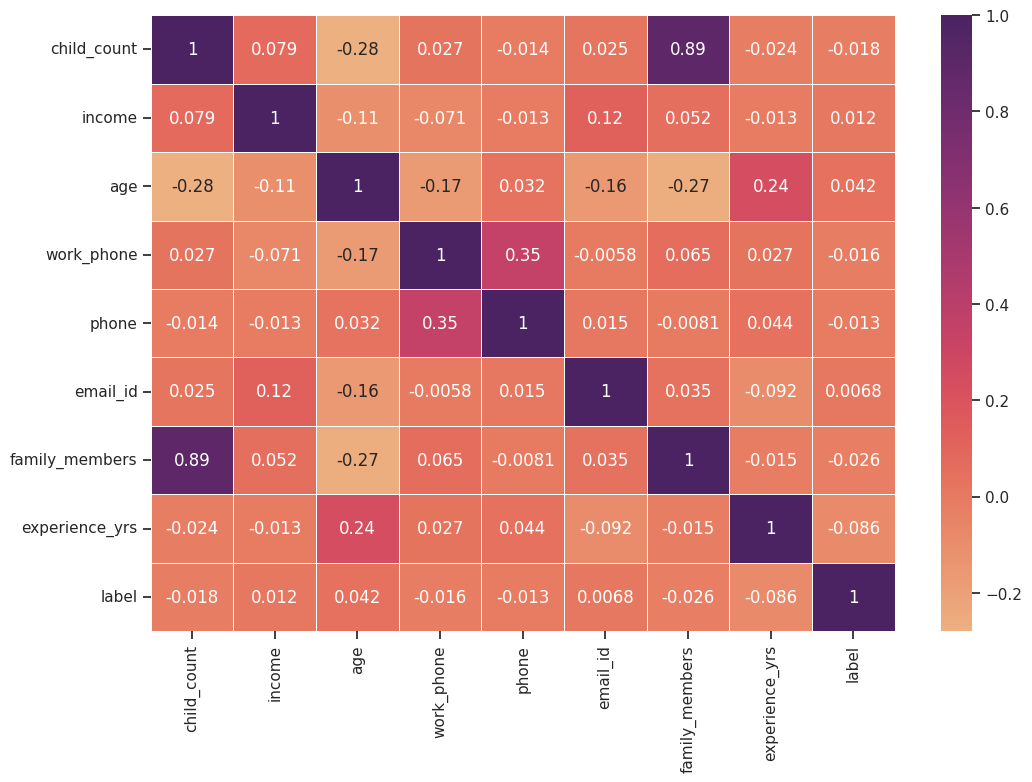

In [101]:
# correlation analysis with heatmap, after dropping the has a mobile phone with the target feature as int
data_without_mobile_corr = pd.concat([credit_data.drop(['mobile_phone','label'], axis=1),label_int],axis=1).corr()
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,8))
# seaborn heatmap
sns.heatmap(data_without_mobile_corr, annot=True, cmap='flare', linewidths=.5)
# plot the heatmap
plt.show()

- No feature is correlated with Outcome variable.
- family_members vs child_count is highly correlated.
- age vs experience has some positive correlation.
- phone vs work_phone has some positive correlation.
-negative correlation of -0.28 suggests that there is a tendency for individuals with higher ages to have slightly fewer children as well as with age vs family members.
- as well as age vs work phone has some weak relationship that there is a tendency for individuals with higher ages to have slightly fewer work phone.
- age vs income has some weak relationship that there is a tendency for individuals with higher ages to have slightly low income.

## ANOVA

- income vs categorical features

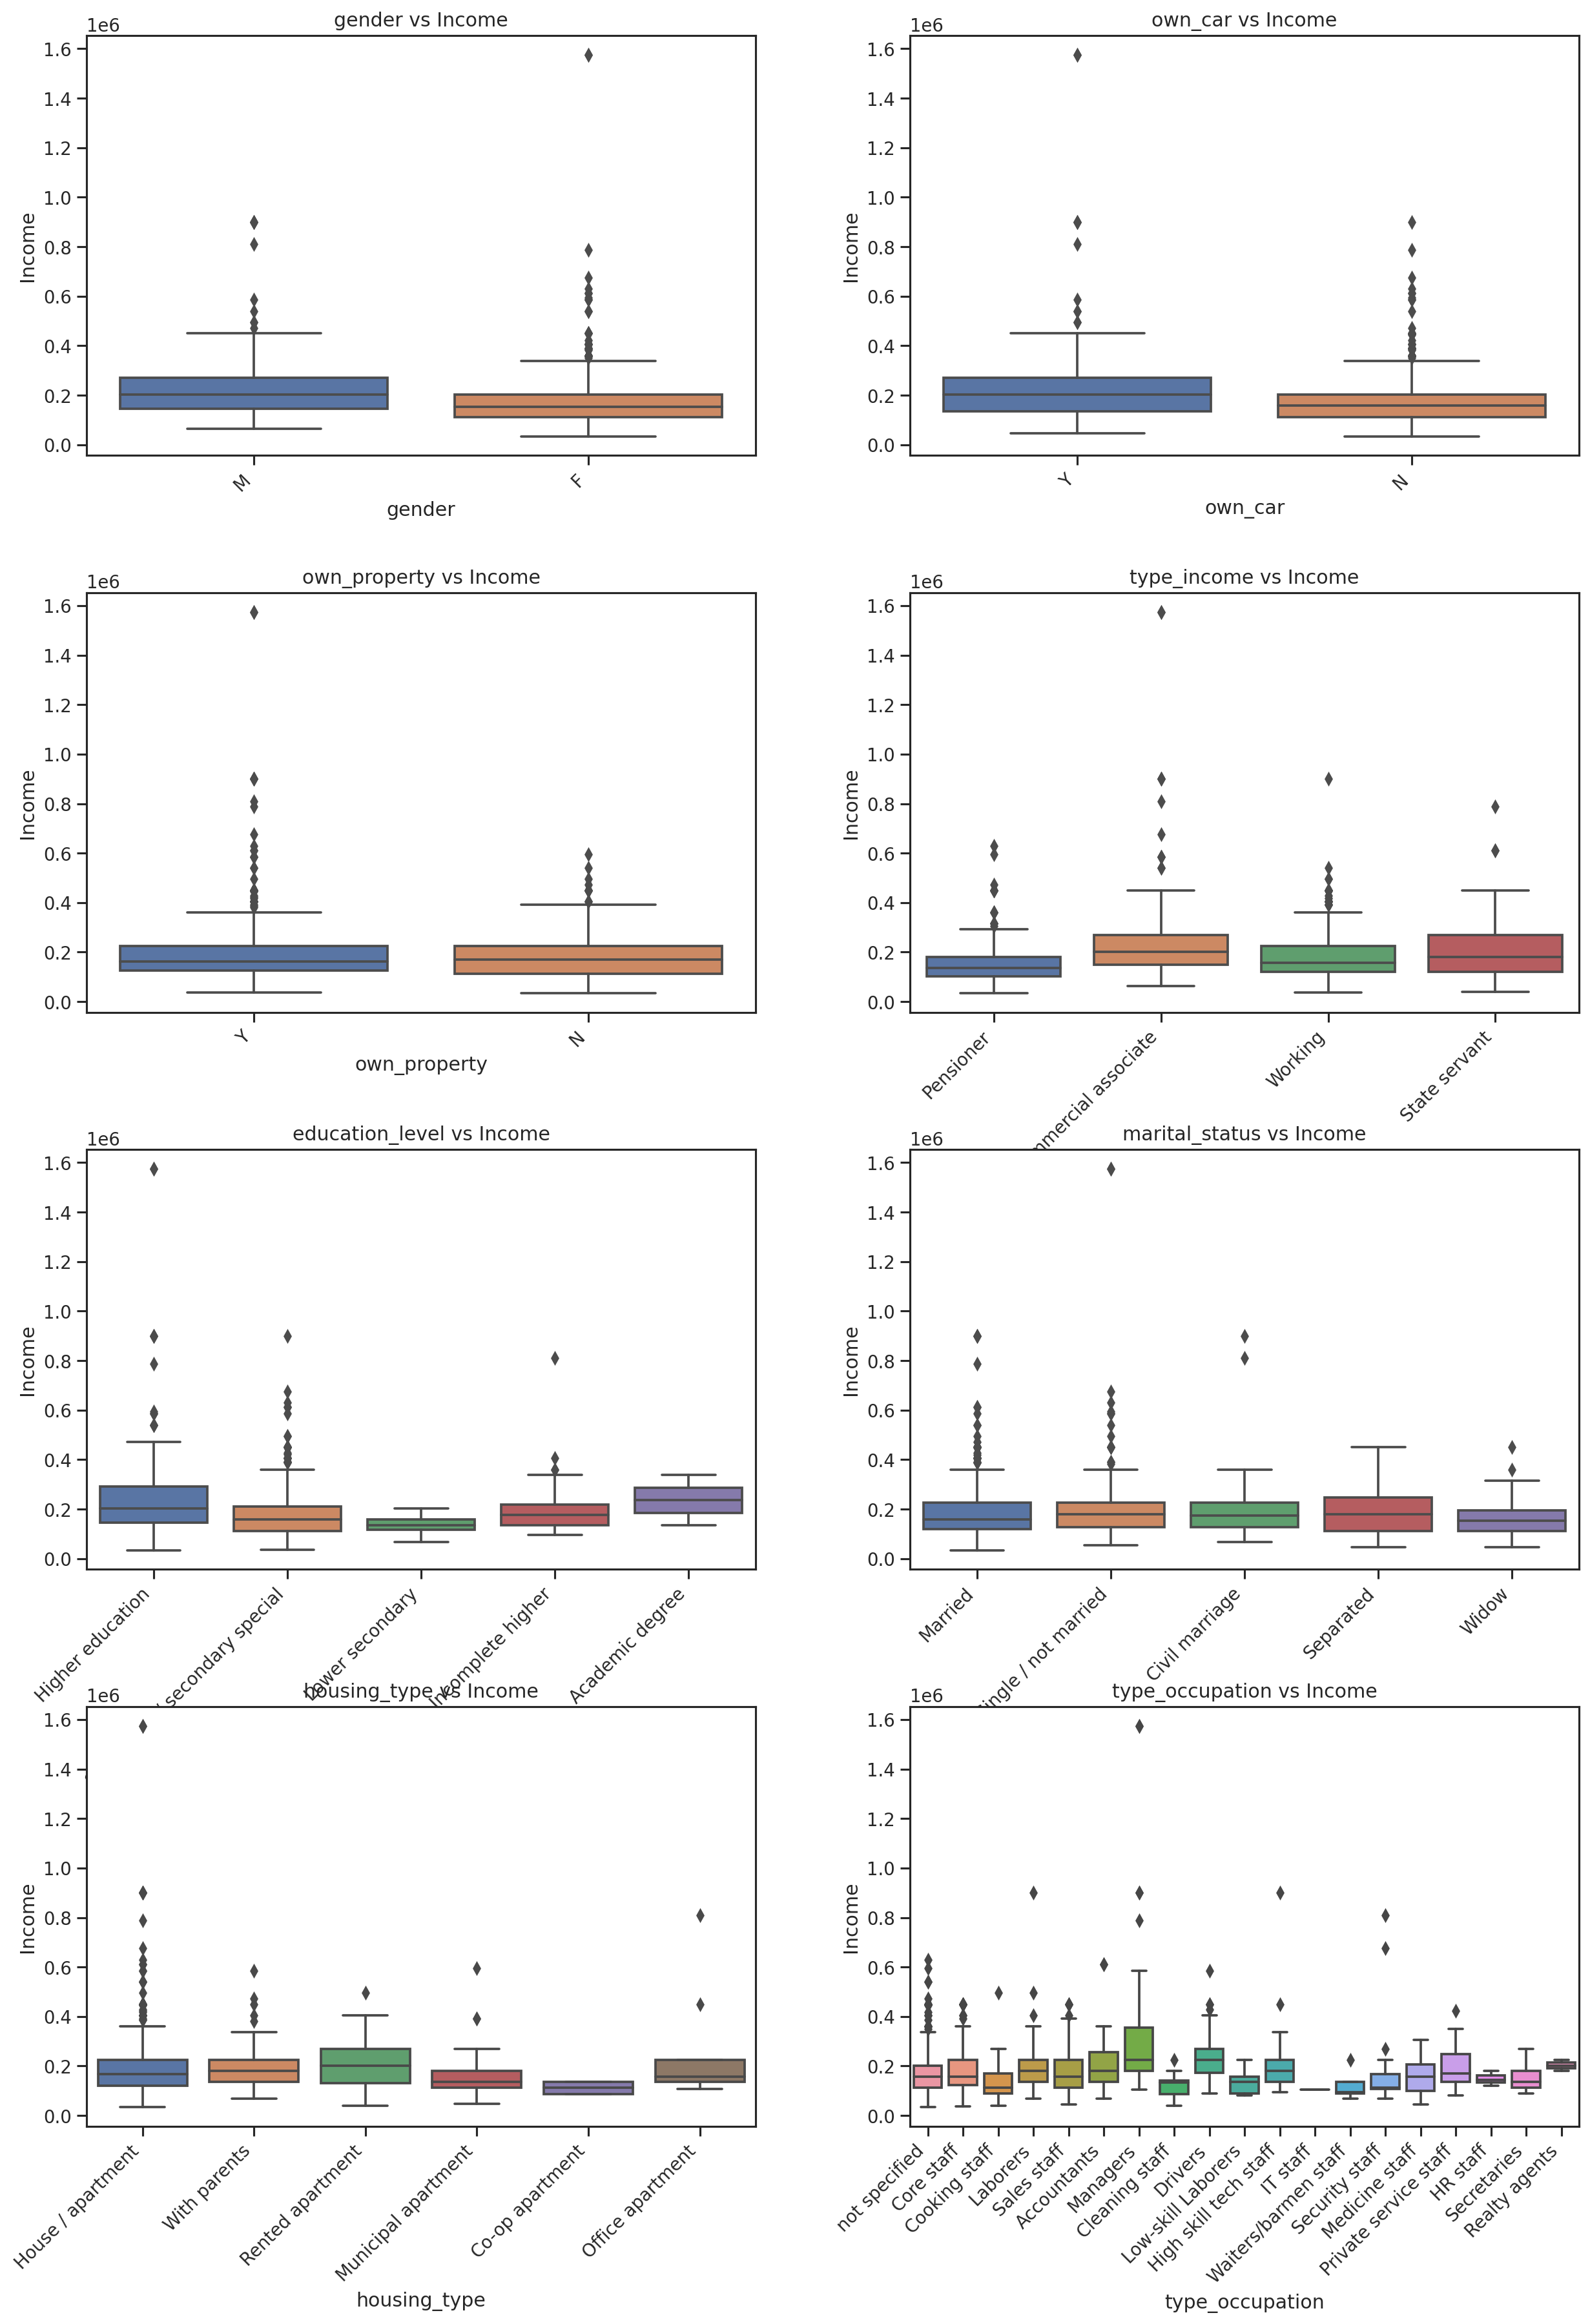

In [102]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)

cat_features = ['gender', 'own_car', 'own_property', 'type_income', 'education_level', 'marital_status', 'housing_type', 'type_occupation']

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=credit_data[cat_features[cat_ft_count]],y=credit_data["income"])
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs Income")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Income')
            cat_ft_count += 1
    break

plt.show()

- Commercial Associate applicant tend to have been employed longer than the rest.

- Those who work in the managerial field, have been employed longer than the rest.

- age vs categorical features

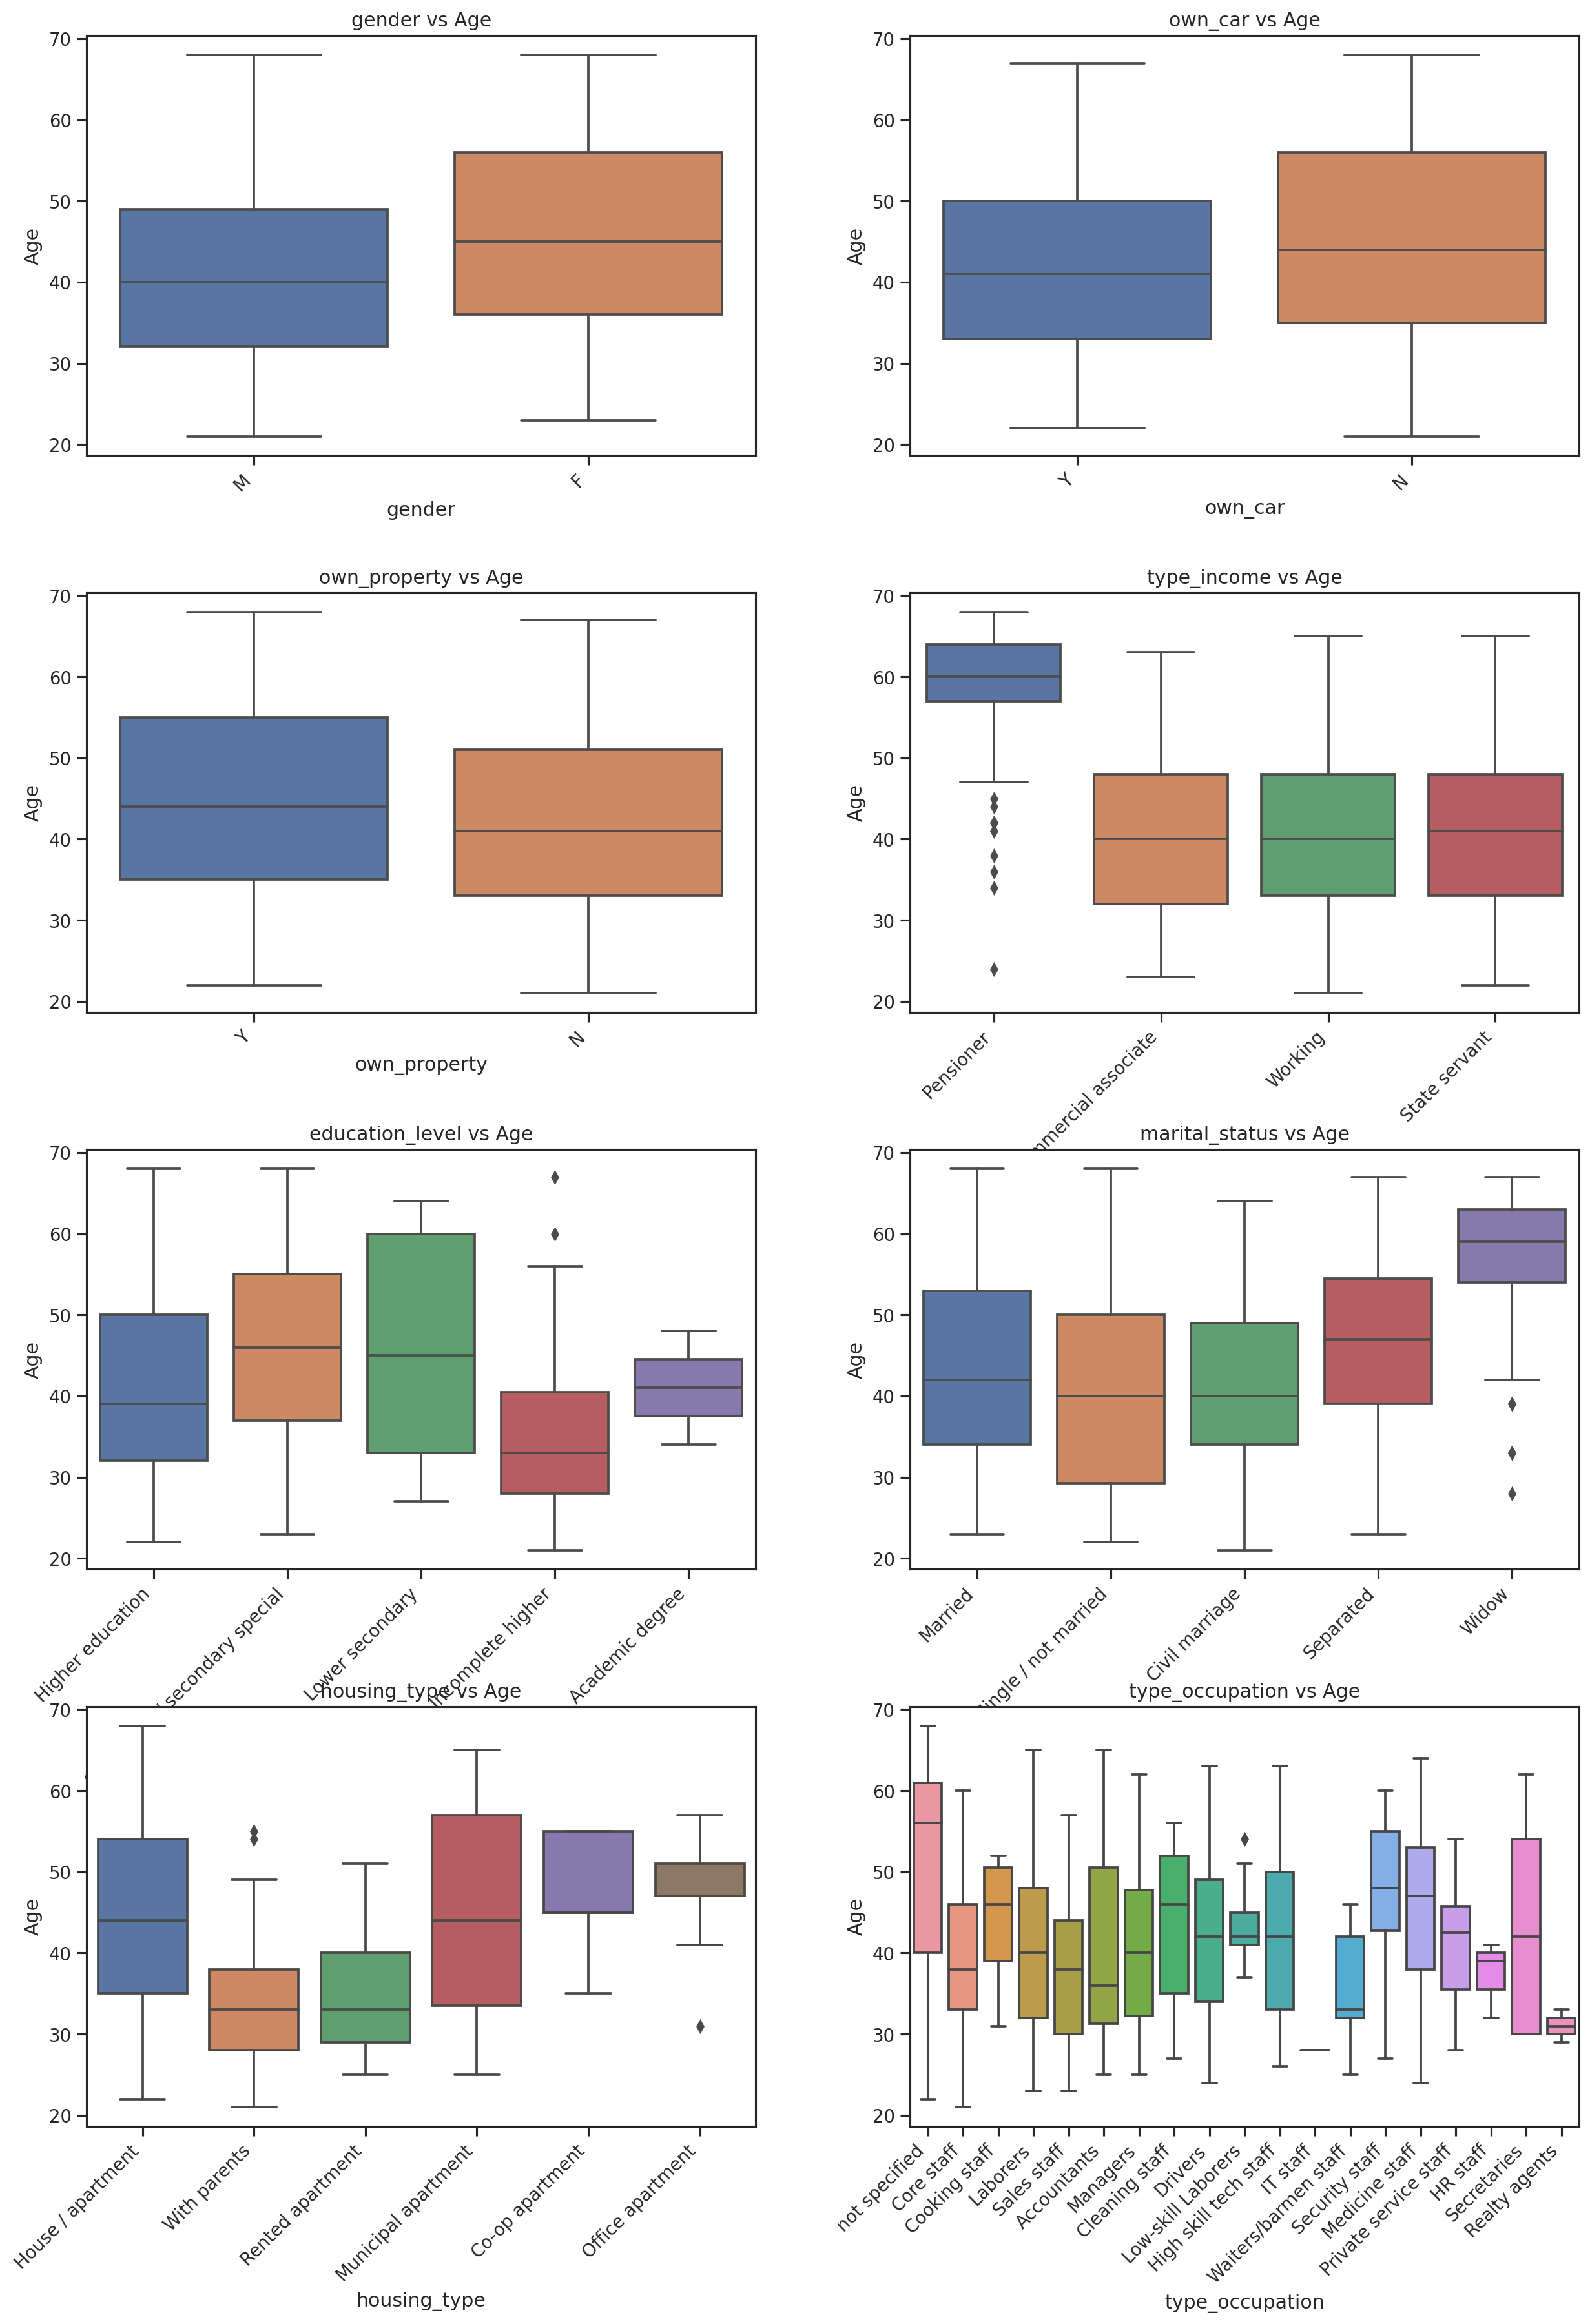

In [103]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)

cat_features = ['gender', 'own_car', 'own_property', 'type_income', 'education_level', 'marital_status', 'housing_type', 'type_occupation']

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=credit_data[cat_features[cat_ft_count]],y=credit_data["age"])
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs Age")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Age')
            cat_ft_count += 1
    break

plt.show()

- Female applicants are older than their male counterpart.

- Those who don't own a car tend to be older.

- Those who own a property tend to be older than those who don't.

- Of course, the pensioners are older that those who are working (We also see that some have pensioned at a young age, those are outliers).

- It is also interesting to see that those who have not completed their higher education degree are younger in general than the other groups.

- Obviously, the widows tend to be much older. We also see some outliers in their 30's as well.

- With no surprise, those who live with parent tend to be younger. We also see some outlier as well.

- Lastly, who work as security staff tend to be older while those who work in sales tend to be younger.

## Chi-Square test

In [104]:
credit_data.columns

Index(['gender', 'own_car', 'own_property', 'child_count', 'income',
       'type_income', 'education_level', 'marital_status', 'housing_type',
       'age', 'mobile_phone', 'work_phone', 'phone', 'email_id',
       'type_occupation', 'family_members', 'label', 'experience_yrs'],
      dtype='object')

In [105]:
import scipy.stats as stats
def chi_func(feature):
    # selection row with high risk
    label_feature = credit_data[credit_data['label'] == 1][feature]
    label_feature_cat = pd.crosstab(index=label_feature, columns=['Count']).rename_axis(None, axis=1)
    # drop the index feature name
    label_feature_cat.index.name = None
    # observed values
    obs = label_feature_cat
    print('Observed values:\n')
    print(obs)
    print('\n')
    # expected values
    print(obs.index)
    exp = pd.DataFrame([obs['Count'].sum()/len(obs)] * len(obs.index),columns=['Count'], index=obs.index)
    print('Expected values:\n')
    print(exp)
    print('\n')
    # chi-square test
    chi_squared_stat = (((obs-exp)**2)/exp).sum()
    print('Chi-square:\n')
    print(chi_squared_stat[0])
    print('\n')
    #critical value
    crit = stats.chi2.ppf(q = 0.95, df = len(obs) - 1)
    print('Critical value:\n')
    print(crit)
    print('\n')
    # p-value
    p_value = 1 - stats.chi2.cdf(x = chi_squared_stat, df = len(obs) - 1)
    print('P-value:\n')
    print(p_value)
    print('\n')
    if chi_squared_stat[0] >= crit:
        print('Reject the null hypothesis')
    elif chi_squared_stat[0] <= crit:
        print('Fail to reject the null hypothesis')

In [106]:
cat_features = ['gender', 'own_car', 'own_property', 'type_income', 'education_level', 'marital_status', 'housing_type', 'type_occupation']
for ft in cat_features:
    print('\n\n**** {} ****\n'.format(ft))
    chi_func(ft)



**** gender ****

Observed values:

   Count
F     89
M     71


Index(['F', 'M'], dtype='object')
Expected values:

   Count
F  80.00
M  80.00


Chi-square:

2.025


Critical value:

3.841458820694124


P-value:

[0.15472892]


Fail to reject the null hypothesis


**** own_car ****

Observed values:

   Count
N    101
Y     59


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N  80.00
Y  80.00


Chi-square:

11.025


Critical value:

3.841458820694124


P-value:

[0.00089891]


Reject the null hypothesis


**** own_property ****

Observed values:

   Count
N     58
Y    102


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N  80.00
Y  80.00


Chi-square:

12.1


Critical value:

3.841458820694124


P-value:

[0.00050422]


Reject the null hypothesis


**** type_income ****

Observed values:

                      Count
Commercial associate     46
Pensioner                37
State servant             5
Working                  72


Index(['Commercial associa

# Insights from the Exploratory Data Analysis EDA

- Profile of an applicant is: A Female in her early 40’s, married with a partner and no child. She has been employed for 5 years with a salary of 166050. She has completed her secondary education. She does not own a car but owns a property (a house/ apartment).

- Age and income do not have any effects on the target variable

- Those who are flagged as bad client, tend to have a shorter Experience. They also constitute less than 2% of total applicants.

# Preparing Data to Apply Machine Learning Algorithms

## Transformation To be done On Each Feature:

## Data Cleaning

## Feature Selection

DROP Features

Why are we droping these features?

ID: ID is not useful for prediction, it helped us when we were merging the two datasets but after that, there is no need to keep it.

Mobile_phone: Since everyone has a mobile phone, this feature does not inform us about anything.

Children : is highly correlated with Family member count, and to avoid multicollinearity, we drop it.

Type_Occupation: Has some missing values and the count of each category is not very different to justify the use of mode. So we drop it.

In [107]:
credit_ml = df.copy(deep = True)

Splitting the dataset into training and test datasets, creating a copy of datasets

In [108]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
train_credit_ml, test_credit_ml = train_test_split(credit_ml, test_size=0.2, random_state=42)

In [109]:
train_credit_ml

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
680   5045113      F         N             Y         0      202500.00   
1079  5142781      M         Y             N         2      157500.00   
1190  5113711      F         Y             Y         1      405000.00   
864   5069117      F         N             Y         0      180000.00   
743   5117561      F         N             N         0      135000.00   
...       ...    ...       ...           ...       ...            ...   
1130  5089632      F         N             N         0      315000.00   
1294  5010498      M         Y             Y         1      202500.00   
860   5021879      M         Y             N         2      112500.00   
1459  5068324      F         N             Y         0      171000.00   
1126  5068339      F         Y             Y         0      112500.00   

               Type_Income                      EDUCATION  \
680              Pensioner  Secondary / secondary special   
1079               Working  Secondary / secondary special   
1190         State servant  Secondary / secondary special   
864              Pensioner  Secondary / secondary special   
743                Working  Secondary / secondary special   
...                    ...                            ...   
1130  Commercial associate               Higher education   
1294               Working  Secondary / secondary special   
860                Working  Secondary / secondary special   
1459               Working               Higher education   
1126               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
680                  Widow  House / apartment       -21126.00         365243   
1079             Separated       With parents       -13979.00          -1626   
1190               Married  House / apartment       -16962.00           -407   
864   Single / not married  House / apartment       -20577.00         365243   
743                Married  House / apartment             NaN           -645   
...                    ...                ...             ...            ...   
1130               Married  House / apartment       -16188.00           -309   
1294               Married  House / apartment       -10218.00           -313   
860                Married  House / apartment       -13095.00           -217   
1459               Married  House / apartment       -18348.00          -3853   
1126               Married  House / apartment       -10101.00           -505   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID        Type_Occupation  \
680              1           0      0         0                    NaN   
1079             1           0      0         0               Laborers   
1190             1           0      1         1               Laborers   
864              1           0      0         0                    NaN   
743              1           1      0         0               Laborers   
...            ...         ...    ...       ...                    ...   
1130             1           1      1         1            Sales staff   
1294             1           1      0         0                    NaN   
860              1           0      1         0               Laborers   
1459             1           0      0         0  High skill tech staff   
1126             1           1      1         0               Laborers   

      Family_Members  label  
680                1      0  
1079               3      0  
1190               3      0  
864                1      0  
743                2      0  
...              ...    ...  
1130               2      0  
1294               3      0  
860                4      0  
1459               2      0  
1126               2      0  

[1238 rows x 19 columns]

In [110]:
test_credit_ml

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
30    5029028      F         N             Y         0       90000.00   
1514  5051097      F         N             N         0       69750.00   
1182  5028990      F         N             N         2       81000.00   
1205  5145968      F         N             Y         0      112500.00   
528   5052755      M         N             Y         0      225000.00   
...       ...    ...       ...           ...       ...            ...   
1228  5078805      F         N             Y         0      306000.00   
1065  5029529      M         Y             Y         0      112500.00   
1345  5146002      M         Y             Y         0      225000.00   
485   5062713      F         N             Y         1      157500.00   
874   5062745      F         N             Y         0      157500.00   

     Type_Income                      EDUCATION        Marital_status  \
30       Working                Lower secondary  Single / not married   
1514   Pensioner  Secondary / secondary special                 Widow   
1182     Working                Lower secondary  Single / not married   
1205   Pensioner  Secondary / secondary special                 Widow   
528      Working  Secondary / secondary special        Civil marriage   
...          ...                            ...                   ...   
1228     Working  Secondary / secondary special               Married   
1065   Pensioner                Lower secondary               Married   
1345     Working  Secondary / secondary special  Single / not married   
485      Working  Secondary / secondary special               Married   
874      Working  Secondary / secondary special               Married   

             Housing_type  Birthday_count  Employed_days  Mobile_phone  \
30       Rented apartment       -12026.00          -4770             1   
1514  Municipal apartment       -21986.00         365243             1   
1182    House / apartment       -15373.00          -2333             1   
1205    House / apartment       -23018.00         365243             1   
528     House / apartment       -10570.00          -1175             1   
...                   ...             ...            ...           ...   
1228    House / apartment       -18927.00          -2978             1   
1065    House / apartment       -21719.00         365243             1   
1345    House / apartment       -10177.00           -189             1   
485     House / apartment       -14510.00          -3805             1   
874     House / apartment       -15035.00          -1128             1   

      Work_Phone  Phone  EMAIL_ID        Type_Occupation  Family_Members  \
30             0      0         0         Cleaning staff               2   
1514           0      1         0                    NaN               1   
1182           0      0         0            Sales staff               3   
1205           0      0         0                    NaN               1   
528            0      0         0               Managers               2   
...          ...    ...       ...                    ...             ...   
1228           0      0         0  High skill tech staff               2   
1065           0      1         0                    NaN               2   
1345           0      0         1               Managers               1   
485            0      0         0             Core staff               3   
874            0      1         0         Cleaning staff               2   

      label  
30        1  
1514      0  
1182      0  
1205      0  
528       0  
...     ...  
1228      0  
1065      0  
1345      0  
485       0  
874       0  

[310 rows x 19 columns]

In [111]:
data_ml = train_credit_ml.copy(deep = True)

In [112]:
data_ml.drop(["Ind_ID","Mobile_phone","CHILDREN", "Type_Occupation"],axis=1,inplace=True)

In [113]:
data_ml.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Annual_income', 'Type_Income',
       'EDUCATION', 'Marital_status', 'Housing_type', 'Birthday_count',
       'Employed_days', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members',
       'label'],
      dtype='object')

Converting Birthday_Count, Employed_days into years

In [114]:
#Converting Birthday_Count in days to years
data_ml['Birthday_count'] = abs(data_ml['Birthday_count'] / 365)
data_ml['Birthday_count'] = data_ml['Birthday_count'].round()

# Convert the "Employed_days" column from days to years and make negative values positive
data_ml['Employed_days'] = abs(data_ml['Employed_days'] / 365.25)
data_ml['Employed_days'] = round(data_ml['Employed_days'], 1)

In [115]:
data_ml= data_ml.rename(columns={
    'Birthday_count'    :'Age',
    'Employed_days'     :'Employed_Years',
    })

In [116]:
data_ml= data_ml.dropna()  #Dropping all Null values

## Feature Encoding

GENDER - [Nominal Data]

Car_Owner - [Nominal Data]

Work_Phone - [Nominal Data]

Marital_Status - [Nominal Data]

Housing_type - [Nominal Data]

Type_Income - [Nominal Data]

As all of these data are Nominal we will use the Pd.get_dummies [Dummy Variable] to convert them into the Numerical Values and will use the drop_first function of the get_dummies function to get rid of the dummy trap .

In [117]:
data_encoded = data_ml.copy()

In [118]:
dummy_features = pd.get_dummies(data_encoded[["GENDER","Car_Owner","Propert_Owner","Work_Phone","Marital_status","Housing_type","Type_Income"]],drop_first=True)
dummy_features = dummy_features.rename(columns={"Work_Phone" :"Work_Phone",
                          "GENDER_M"         :"Male",
                          "Car_Owner_Y"      :"Car",
                          "Propert_Owner_Y" :"Property",
                          "Marital_status_Married" : "Married",
                          "Marital_status_Separated":"Separated",
                          "Marital_status_Single / not married":"Single",
                          "Marital_status_Widow" : "Widow",
                          "Housing_type_House / apartment":"Apartment",
                          'Housing_type_Municipal apartment' :"Municipal_Apartment",
                          "Housing_type_Office apartment":"Office_Apartment",
                          "Housing_type_Rented apartment" :"Rented_Apartment",
                          "Housing_type_With parents" :"Living_With_Parents",
                          "Type_Income_Pensioner"  : "Pensioner",
                          "Type_Income_State servant":"State_Servent",
                          "Type_Income_Working"   : "Working"
                         })
data_ml= data_ml.drop(["GENDER","Car_Owner","Work_Phone",
                    "Propert_Owner","Marital_status","Housing_type","Type_Income"],axis=1)

data_ml = pd.concat([data_ml,dummy_features],axis=1)

In [119]:
from sklearn.preprocessing import OrdinalEncoder
# create an instance of the encoder
encoder = OrdinalEncoder(categories=[['Lower secondary', 'Incomplete higher', 'Secondary / secondary special', 'Higher education', 'Academic degree']])
# encode the Education_level feature
data_ml['Education_level_Encoded'] = encoder.fit_transform(data_ml[['EDUCATION']])
# drop the original Education_level column
data_ml.drop('EDUCATION', axis=1, inplace=True)

In [120]:
# Replacing the 1000 in Employed Years with np.NaN and
# Will do the Imputations
data_ml["Employed_Years"] = data_ml["Employed_Years"].replace(1000,np.NaN)

Imputing row 1/1198 with 1 missing, elapsed time: 0.313
Imputing row 101/1198 with 0 missing, elapsed time: 0.315
Imputing row 201/1198 with 0 missing, elapsed time: 0.317
Imputing row 301/1198 with 0 missing, elapsed time: 0.318
Imputing row 401/1198 with 0 missing, elapsed time: 0.320
Imputing row 501/1198 with 0 missing, elapsed time: 0.321
Imputing row 601/1198 with 0 missing, elapsed time: 0.323
Imputing row 701/1198 with 0 missing, elapsed time: 0.324
Imputing row 801/1198 with 0 missing, elapsed time: 0.326
Imputing row 901/1198 with 0 missing, elapsed time: 0.327
Imputing row 1001/1198 with 1 missing, elapsed time: 0.328
Imputing row 1101/1198 with 0 missing, elapsed time: 0.329


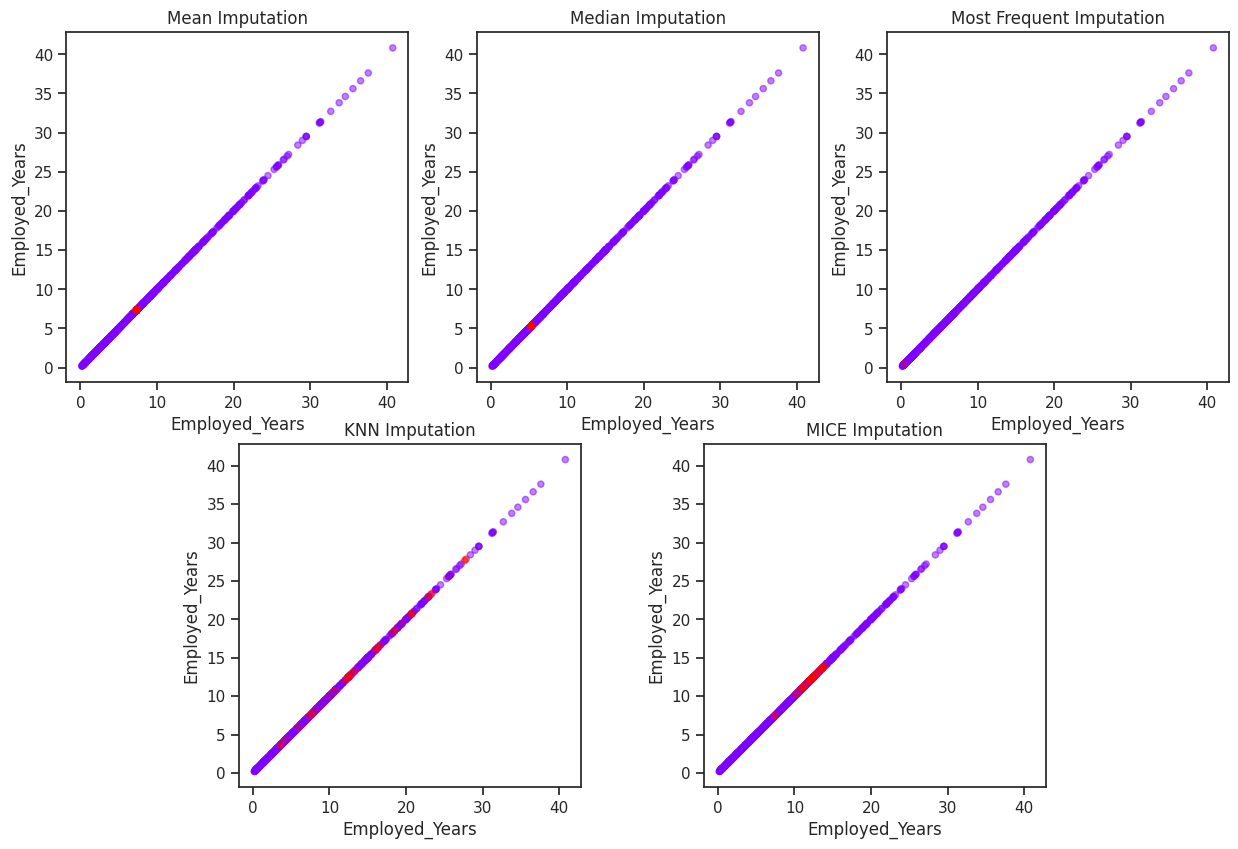

In [121]:
#Mean Imputation
from sklearn.impute import SimpleImputer
imputer_mean = data_ml.copy()
mean_imputer = SimpleImputer(strategy="mean")
imputer_mean.iloc[:,:] = mean_imputer.fit_transform(imputer_mean)

#Median Imputation
imputer_median = data_ml.copy()
median_imputer = SimpleImputer(strategy="median")
imputer_median.iloc[:,:] = median_imputer.fit_transform(imputer_median)
imputer_median

#Mode Imputation
imputer_mode = data_ml.copy()
mode_imputer = SimpleImputer(strategy="most_frequent")
imputer_mode.iloc[:,:] = mode_imputer.fit_transform(imputer_mode)
imputer_mode

#KNN imputation
knn_imputer = KNN()
imputer_knn = data_ml.copy()
imputer_knn.iloc[:,:] = knn_imputer.fit_transform(imputer_knn)
imputer_knn

# MICE Imputation
MICE_imputer = IterativeImputer()
imputer_MICE = data_ml.copy(deep=True)
imputer_MICE.iloc[:, :] = MICE_imputer.fit_transform(imputer_MICE)

fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])
nullity = data_ml['Employed_Years'].isnull() + data_ml['Age'].isnull()
imputations = {'Mean Imputation': imputer_mean,
               'Median Imputation': imputer_median,
               'Most Frequent Imputation': imputer_mode,
               'KNN Imputation': imputer_knn,
              'MICE Imputation': imputer_MICE}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Employed_Years',y="Employed_Years",kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

plt.show()

In [122]:
data_ml= imputer_knn.copy()

## Handling Outliers

<Axes: >

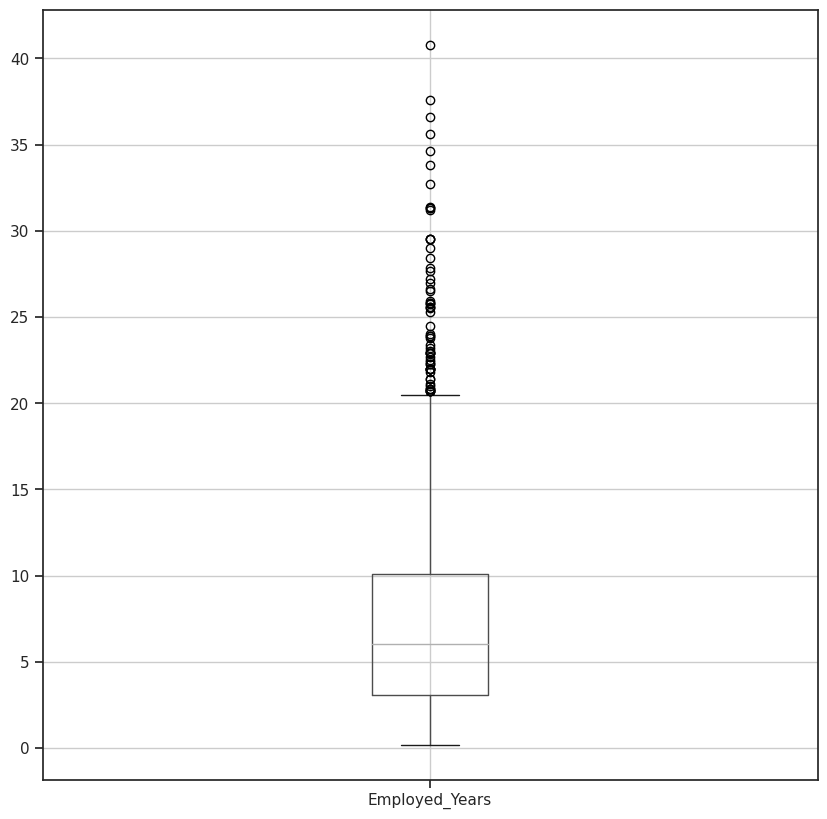

In [123]:
df_o = pd.DataFrame(data = data_ml, columns = ["Employed_Years"])
df_o.boxplot(figsize=(10,10))

<Axes: >

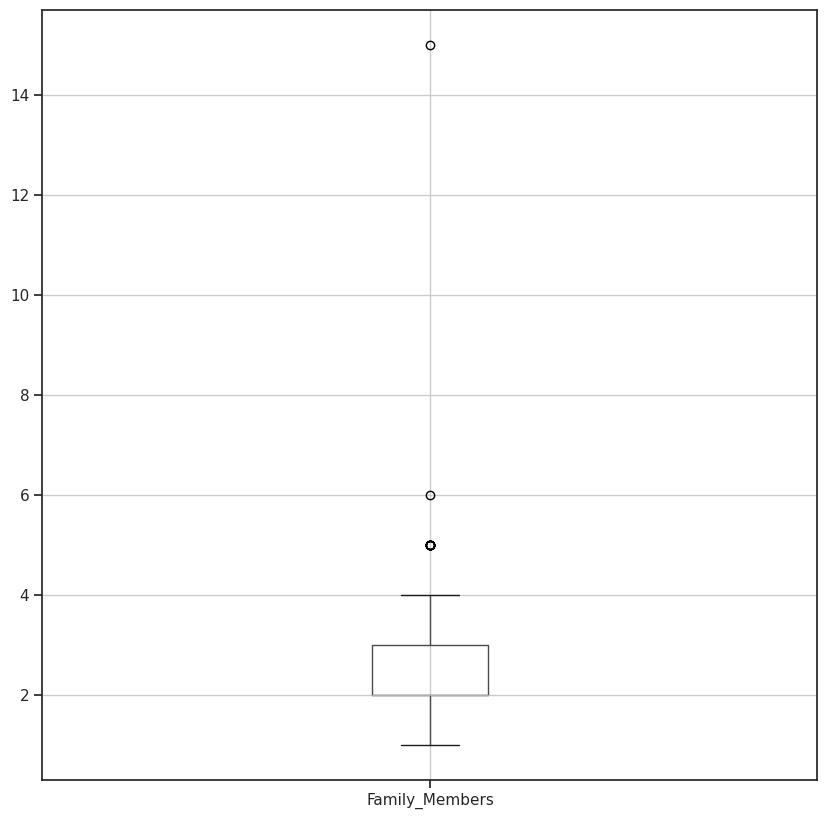

In [124]:
df_o = pd.DataFrame(data = data_ml, columns = ["Family_Members"])
df_o.boxplot(figsize=(10,10))

<Axes: >

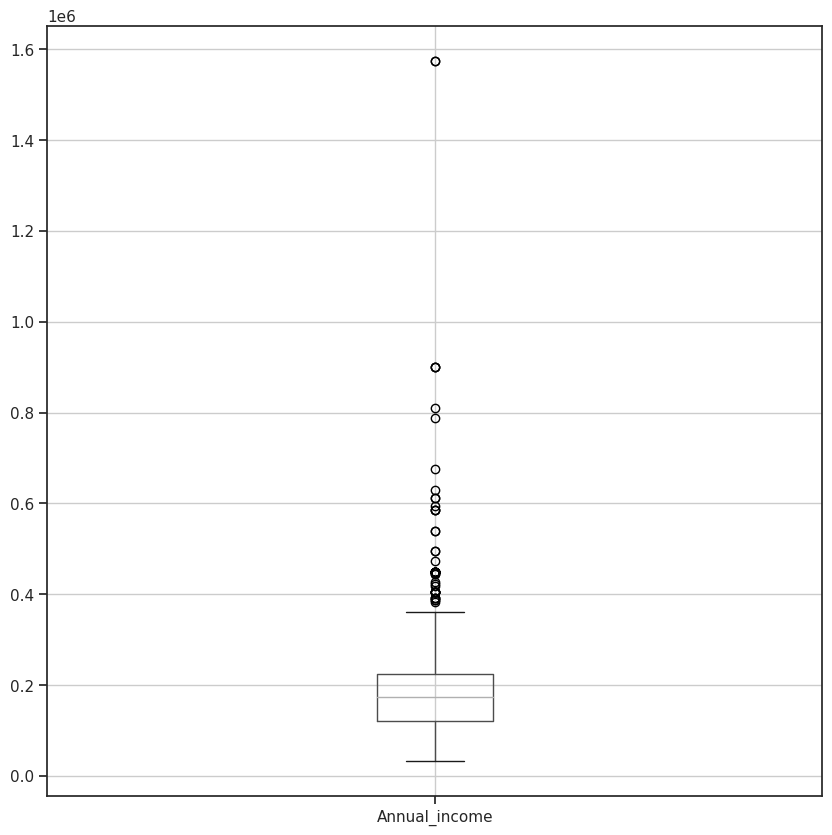

In [125]:
df_o = pd.DataFrame(data = data_ml, columns = ["Annual_income"])
df_o.boxplot(figsize=(10,10))

In [126]:
df_out = pd.DataFrame(data = data_ml, columns = ["Employed_Years","Family_Members","Annual_income"])

In [127]:
outliers_list = ["Family_Members","Annual_income","Employed_Years"]

In [128]:
def ohiqr(df):
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)
        m = df.mean()
        df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
        return df

In [129]:
for i in outliers_list:
    data_ml[i] = ohiqr(df_out[i])

<Axes: >

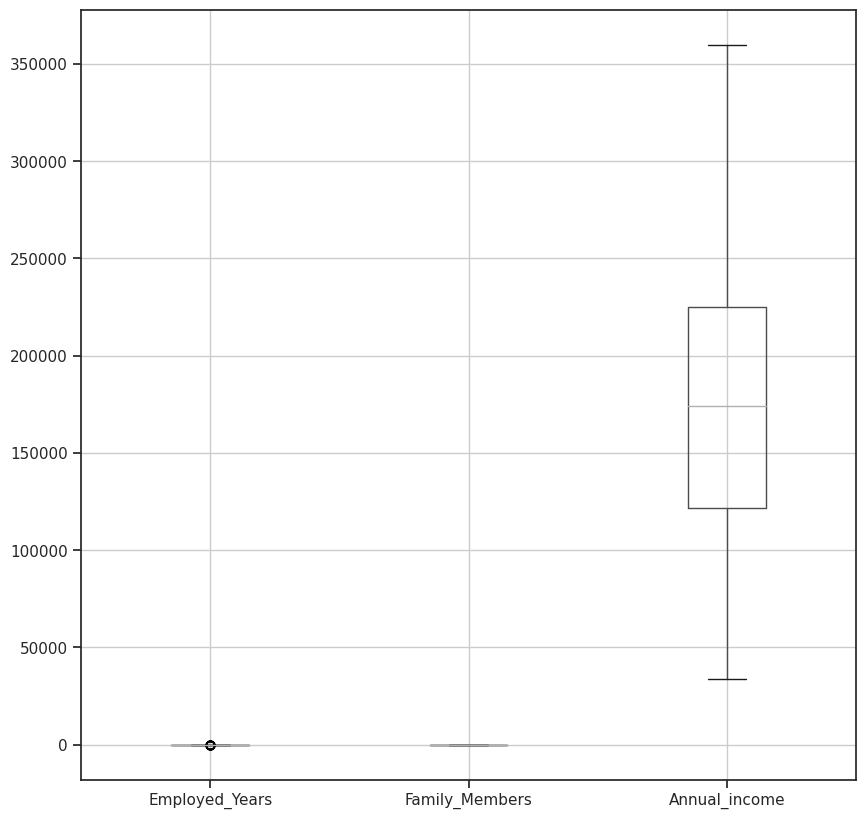

In [130]:
df_o = pd.DataFrame(data = data_ml, columns = ["Employed_Years","Family_Members","Annual_income"])
df_o.boxplot(figsize=(10,10))

<Axes: xlabel='Annual_income', ylabel='Density'>

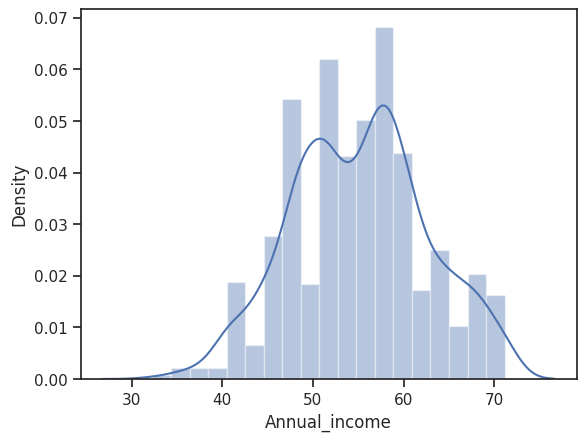

In [131]:
# cube root transformation
data_ml['Annual_income'] = np.cbrt(data_ml['Annual_income'])
sns.distplot(data_ml['Annual_income'])

<Axes: xlabel='Age', ylabel='Density'>

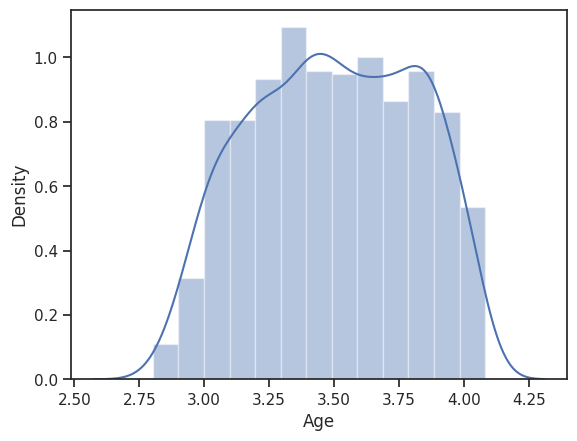

In [132]:
# cube root transformation
data_ml['Age'] = np.cbrt(data_ml['Age'])
sns.distplot(data_ml['Age'])

In [133]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to be scaled
cols_to_scale = ['Age', 'Annual_income', 'Employed_Years']

# Fit and transform the selected columns
data_ml[cols_to_scale] = scaler.fit_transform(data_ml[cols_to_scale])

# Check the scaled columns
print(data_ml[cols_to_scale])


      Age  Annual_income  Employed_Years
680  0.84           0.68            0.27
1079 0.44           0.56            0.21
1190 0.61           0.66            0.04
864  0.80           0.62            0.52
233  0.18           0.66            0.33
...   ...            ...             ...
1130 0.57           0.92            0.03
1294 0.18           0.68            0.03
860  0.39           0.41            0.02
1459 0.69           0.60            0.51
1126 0.18           0.41            0.06

[1198 rows x 3 columns]


In [134]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 680 to 1126
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Annual_income            1198 non-null   float64
 1   Age                      1198 non-null   float64
 2   Employed_Years           1198 non-null   float64
 3   Phone                    1198 non-null   float64
 4   EMAIL_ID                 1198 non-null   float64
 5   Family_Members           1198 non-null   float64
 6   label                    1198 non-null   float64
 7   Work_Phone               1198 non-null   float64
 8   Male                     1198 non-null   float64
 9   Car                      1198 non-null   float64
 10  Property                 1198 non-null   float64
 11  Married                  1198 non-null   float64
 12  Separated                1198 non-null   float64
 13  Single                   1198 non-null   float64
 14  Widow                 

In [135]:
data_ml['label'] = pd.to_numeric(data_ml['label'])

In [136]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='minority')
X_bal, y_bal = oversample.fit_resample(data_ml.loc[:, data_ml.columns != 'label'],data_ml['label'])
data_ml = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)

In [137]:
# split the train data into X and y (target)
X_train, y_train = data_ml.loc[:, data_ml.columns != 'label'], data_ml['label'].astype('int64')

# REPEATING ALL PREPROCESSING STEPS ON TEST DATA ALSO

In [138]:
data_ml_test= test_credit_ml.copy()

In [139]:
data_ml_test.drop(["Ind_ID","Mobile_phone","CHILDREN", "Type_Occupation"],axis=1,inplace=True)


In [140]:
#Converting Birthday_Count in days to years
data_ml_test['Birthday_count'] = abs(data_ml_test['Birthday_count'] / 365)
data_ml_test['Birthday_count'] = data_ml_test['Birthday_count'].round()

# Convert the "Employed_days" column from days to years and make negative values positive
data_ml_test['Employed_days'] = abs(data_ml_test['Employed_days'] / 365.25)
data_ml_test['Employed_days'] = round(data_ml_test['Employed_days'], 1)

In [141]:
data_ml_test= data_ml_test.rename(columns={
    'Birthday_count'    :'Age',
    'Employed_days'     :'Employed_Years',
    })

In [142]:
data_ml_test= data_ml_test.dropna()

In [143]:
data_encoded_test = data_ml_test.copy()

In [144]:
dummy_features = pd.get_dummies(data_encoded_test[["GENDER","Car_Owner","Propert_Owner","Work_Phone","Marital_status","Housing_type","Type_Income"]],drop_first=True)
dummy_features = dummy_features.rename(columns={"Work_Phone" :"Work_Phone",
                          "GENDER_M"         :"Male",
                          "Car_Owner_Y"      :"Car",
                          "Propert_Owner_Y" :"Property",
                          "Marital_status_Married" : "Married",
                          "Marital_status_Separated":"Separated",
                          "Marital_status_Single / not married":"Single",
                          "Marital_status_Widow" : "Widow",
                          "Housing_type_House / apartment":"Apartment",
                          'Housing_type_Municipal apartment' :"Municipal_Apartment",
                          "Housing_type_Office apartment":"Office_Apartment",
                          "Housing_type_Rented apartment" :"Rented_Apartment",
                          "Housing_type_With parents" :"Living_With_Parents",
                          "Type_Income_Pensioner"  : "Pensioner",
                          "Type_Income_State servant":"State_Servent",
                          "Type_Income_Working"   : "Working"
                         })
data_ml_test= data_ml_test.drop(["GENDER","Car_Owner","Work_Phone",
                    "Propert_Owner","Marital_status","Housing_type","Type_Income"],axis=1)

data_ml_test = pd.concat([data_ml_test,dummy_features],axis=1)

In [145]:
from sklearn.preprocessing import OrdinalEncoder
# create an instance of the encoder
encoder = OrdinalEncoder(categories=[['Lower secondary', 'Incomplete higher', 'Secondary / secondary special', 'Higher education', 'Academic degree']])
# encode the Education_level feature
data_ml_test['Education_level_Encoded'] = encoder.fit_transform(data_ml_test[['EDUCATION']])
# drop the original Education_level column
data_ml_test.drop('EDUCATION', axis=1, inplace=True)

In [146]:
# Replacing the 1000 in Employed Years with np.NaN and
# Will do the Imputations
data_ml_test["Employed_Years"] = data_ml_test["Employed_Years"].replace(1000,np.NaN)

Imputing row 1/298 with 0 missing, elapsed time: 0.025
Imputing row 101/298 with 0 missing, elapsed time: 0.027
Imputing row 201/298 with 0 missing, elapsed time: 0.028


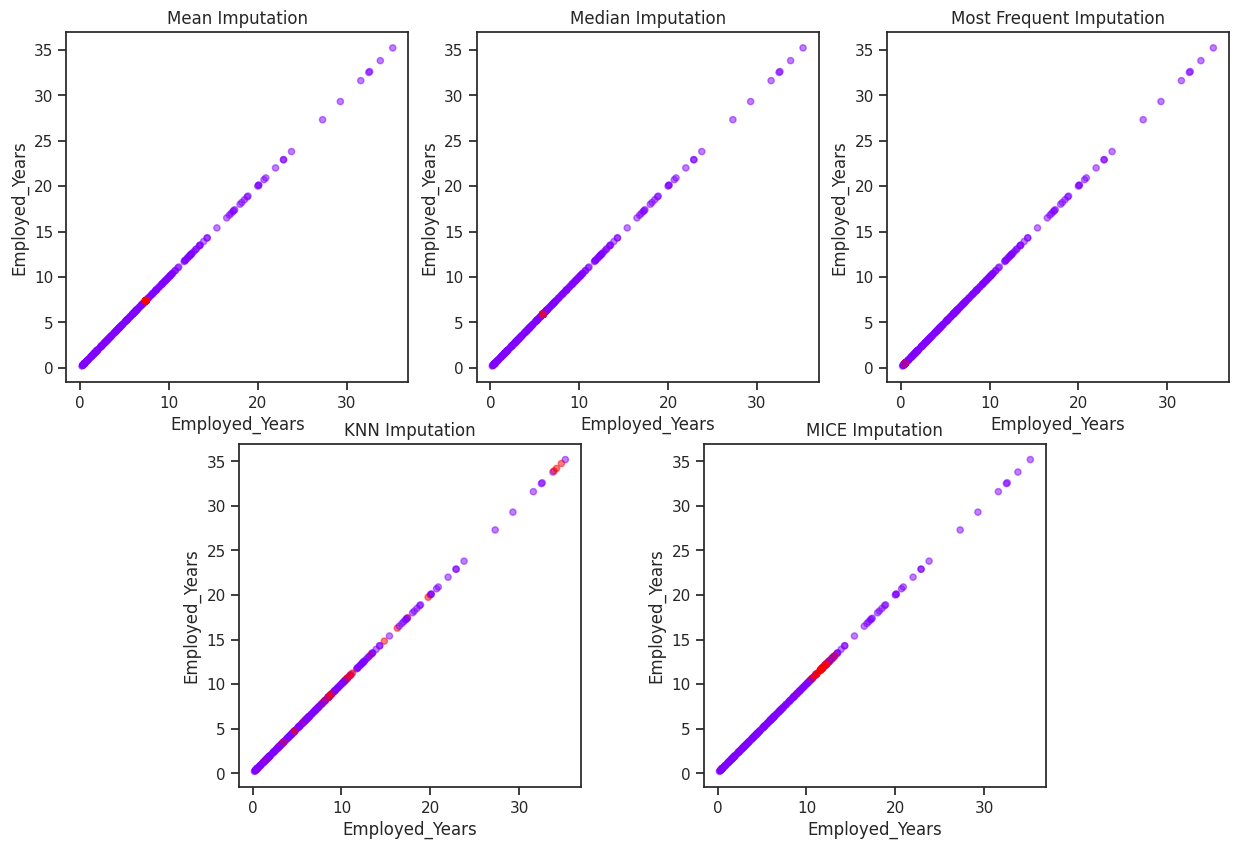

In [147]:
#Mean Imputation
from sklearn.impute import SimpleImputer
imputer_mean = data_ml_test.copy()
mean_imputer = SimpleImputer(strategy="mean")
imputer_mean.iloc[:,:] = mean_imputer.fit_transform(imputer_mean)

#Median Imputation
imputer_median = data_ml_test.copy()
median_imputer = SimpleImputer(strategy="median")
imputer_median.iloc[:,:] = median_imputer.fit_transform(imputer_median)
imputer_median

#Mode Imputation
imputer_mode = data_ml_test.copy()
mode_imputer = SimpleImputer(strategy="most_frequent")
imputer_mode.iloc[:,:] = mode_imputer.fit_transform(imputer_mode)
imputer_mode

#KNN imputation
knn_imputer = KNN()
imputer_knn = data_ml_test.copy()
imputer_knn.iloc[:,:] = knn_imputer.fit_transform(imputer_knn)
imputer_knn

# MICE Imputation
MICE_imputer = IterativeImputer()
imputer_MICE = data_ml_test.copy(deep=True)
imputer_MICE.iloc[:, :] = MICE_imputer.fit_transform(imputer_MICE)

fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])
nullity = data_ml_test['Employed_Years'].isnull() + data_ml_test['Age'].isnull()
imputations = {'Mean Imputation': imputer_mean,
               'Median Imputation': imputer_median,
               'Most Frequent Imputation': imputer_mode,
               'KNN Imputation': imputer_knn,
              'MICE Imputation': imputer_MICE}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Employed_Years',y="Employed_Years",kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

plt.show()

In [148]:
data_ml_test= imputer_knn.copy()

<Axes: >

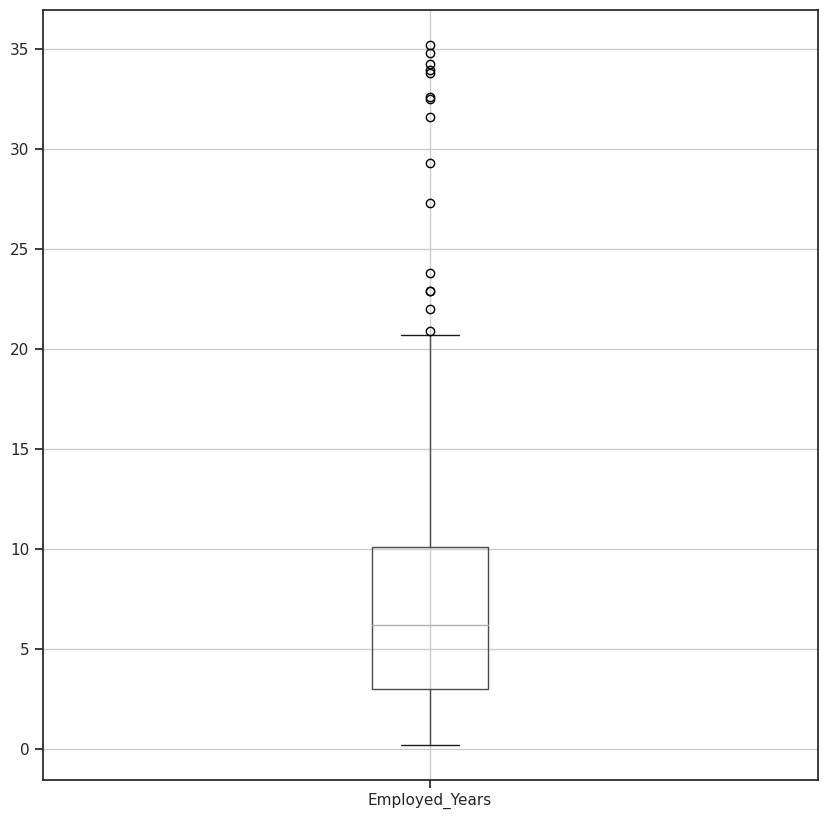

In [149]:
df_o = pd.DataFrame(data = data_ml_test, columns = ["Employed_Years"])
df_o.boxplot(figsize=(10,10))

<Axes: >

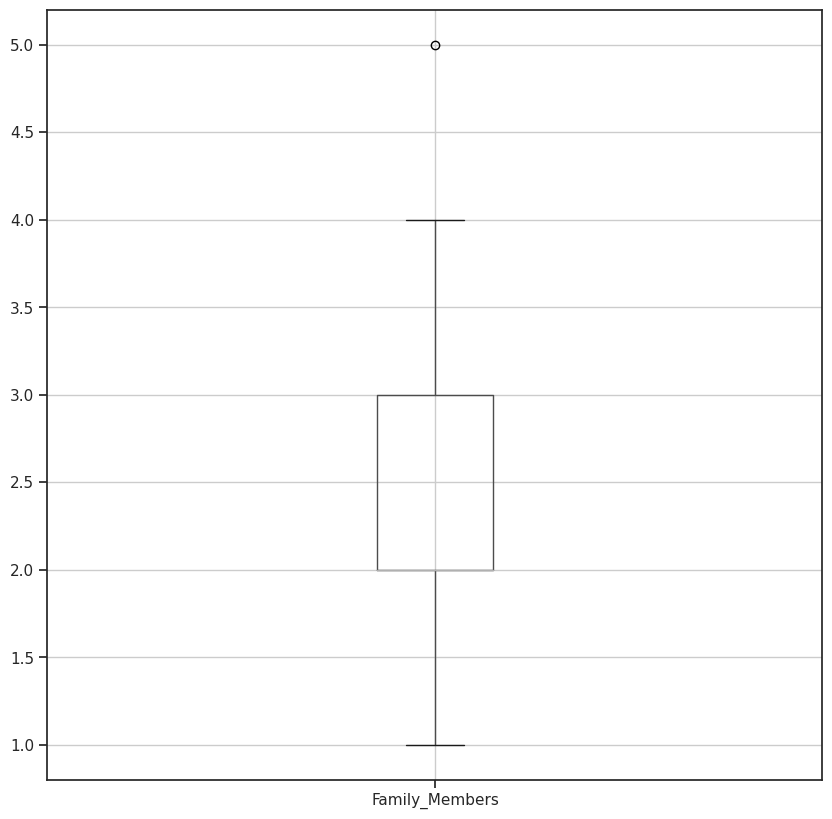

In [150]:
df_o = pd.DataFrame(data = data_ml_test, columns = ["Family_Members"])
df_o.boxplot(figsize=(10,10))

<Axes: >

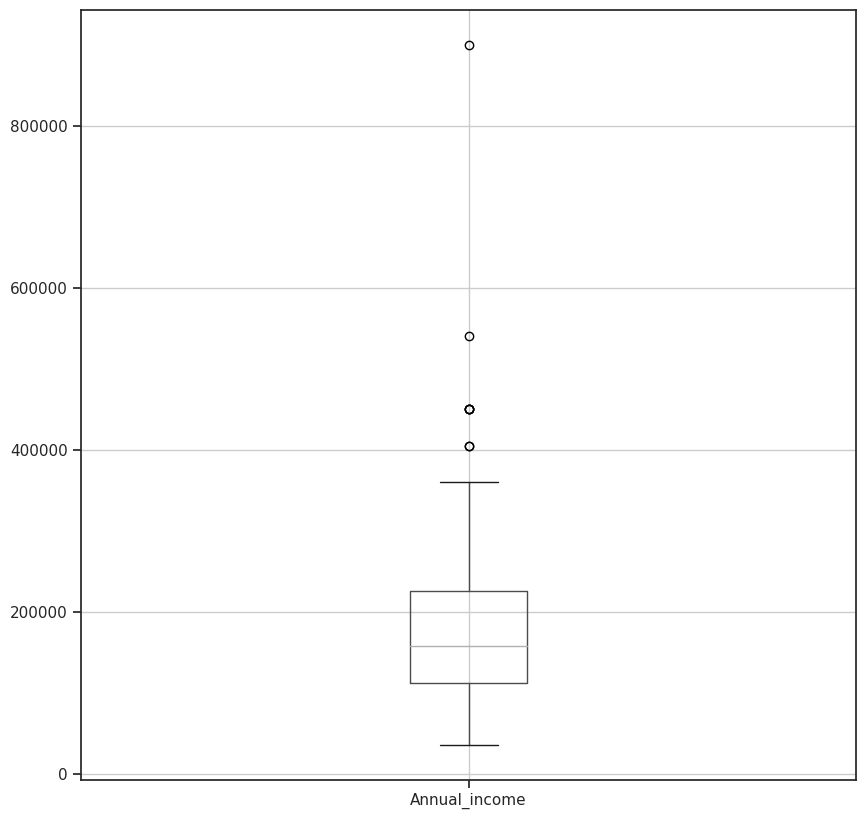

In [151]:
df_o = pd.DataFrame(data = data_ml_test, columns = ["Annual_income"])
df_o.boxplot(figsize=(10,10))

In [152]:
df_out = pd.DataFrame(data = data_ml_test, columns = ["Employed_Years","Family_Members","Annual_income"])

In [153]:
outliers_list = ["Family_Members","Annual_income","Employed_Years"]

In [154]:
def ohiqr(df):
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)
        m = df.mean()
        df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
        return df

In [155]:
for i in outliers_list:
    data_ml_test[i] = ohiqr(df_out[i])

<Axes: >

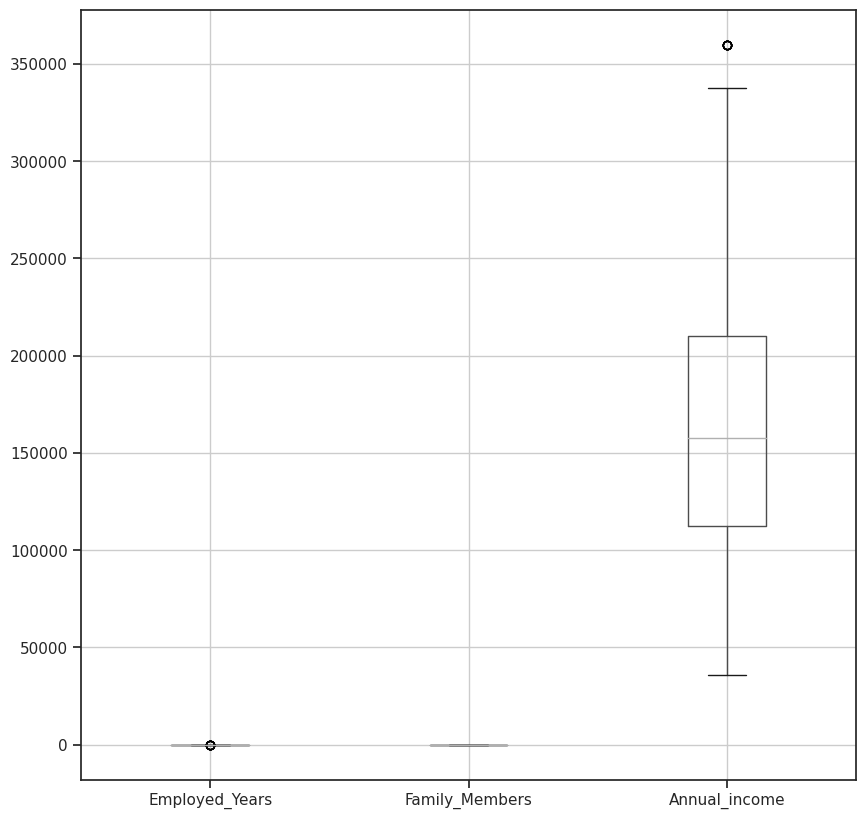

In [156]:
df_o = pd.DataFrame(data = data_ml_test, columns = ["Employed_Years","Family_Members","Annual_income"])
df_o.boxplot(figsize=(10,10))

<Axes: xlabel='Annual_income', ylabel='Density'>

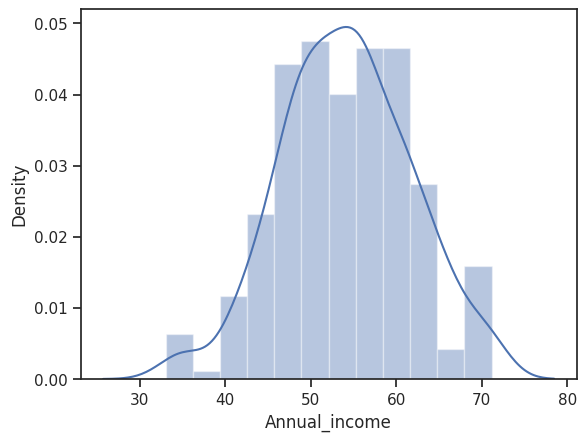

In [157]:
# cube root transformation
data_ml_test['Annual_income'] = np.cbrt(data_ml_test['Annual_income'])
sns.distplot(data_ml_test['Annual_income'])

<Axes: xlabel='Age', ylabel='Density'>

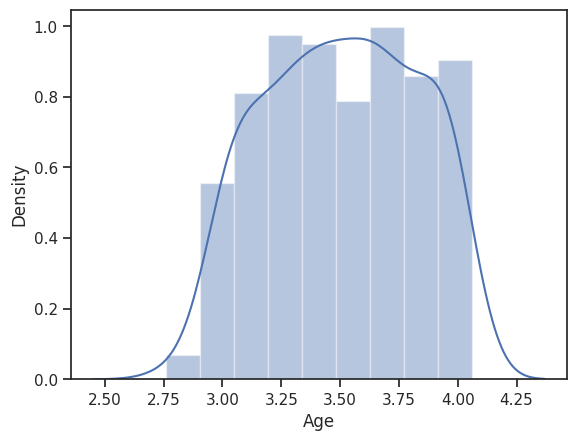

In [158]:
# cube root transformation
data_ml_test['Age'] = np.cbrt(data_ml_test['Age'])
sns.distplot(data_ml_test['Age'])

In [159]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to be scaled
cols_to_scale = ['Age', 'Annual_income', 'Employed_Years']

# Fit and transform the selected columns
data_ml_test[cols_to_scale] = scaler.fit_transform(data_ml_test[cols_to_scale])

# Check the scaled columns
print(data_ml_test[cols_to_scale])


      Age  Annual_income  Employed_Years
30   0.34           0.31            0.63
1514 0.89           0.21            0.15
1182 0.55           0.27            0.30
1205 0.94           0.40            0.16
528  0.24           0.73            0.15
...   ...            ...             ...
1228 0.75           0.90            0.39
1065 0.89           0.40            0.41
1345 0.21           0.73            0.01
485  0.51           0.55            0.50
874  0.53           0.55            0.14

[298 rows x 3 columns]


In [160]:
data_ml_test['label'] = pd.to_numeric(data_ml_test['label'])

In [161]:
oversample = SMOTE(sampling_strategy='minority')
X_bal, y_bal = oversample.fit_resample(data_ml_test.loc[:, data_ml_test.columns != 'label'],data_ml_test['label'])
data_ml_test = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)

In [162]:
# split the train data into X and y (target)
X_test, y_test = data_ml_test.loc[:, data_ml_test.columns != 'label'], data_ml_test['label'].astype('int64')

# Model Training

## Logistic Regression

In [163]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

In [164]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [165]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [166]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [167]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[156, 116],
       [ 88, 184]])

In [168]:
### accuracy using accuracy_score
print(round(accuracy_score(y_test, logistic_reg_pred), 2))

0.62


In [169]:
print(round(precision_score(y_test, logistic_reg_pred), 2))

0.61


In [170]:
print(round(recall_score(y_test, logistic_reg_pred), 2))

0.68


In [171]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.625

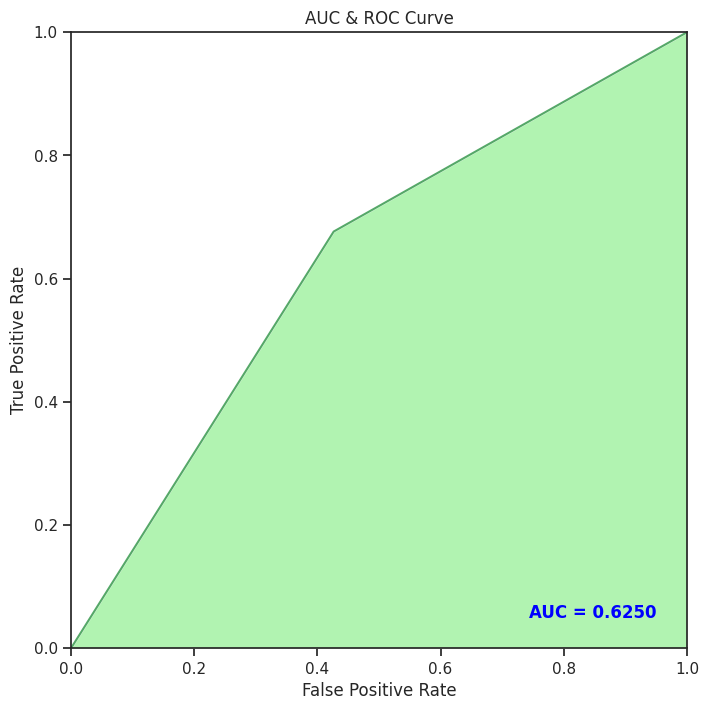

In [172]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Decision Tree

In [173]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [174]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9962 
Decision tree testing set accuracy: 0.7886 


In [175]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       272
           1       0.88      0.67      0.76       272

    accuracy                           0.79       544
   macro avg       0.80      0.79      0.79       544
weighted avg       0.80      0.79      0.79       544



In [176]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [177]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.6273 
Decision tree testing set accuracy: 0.6654 


In [178]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.42      0.56       272
           1       0.61      0.91      0.73       272

    accuracy                           0.67       544
   macro avg       0.72      0.67      0.64       544
weighted avg       0.72      0.67      0.64       544



## Random Forest Classifier

In [179]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [180]:
#Predicting the test set result
y_pred= classifier.predict(X_test)
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[259,  13],
       [121, 151]])

In [181]:
print(f"Random Forest training set accuracy: {format(classifier.score(X_train, y_train), '.4f')} ")
print(f"Random Forest testing set accuracy: {format(classifier.score(X_test, y_test), '.4f')} ")

Random Forest training set accuracy: 0.9939 
Random Forest testing set accuracy: 0.7537 


## Support Vector Machine

In [182]:
from sklearn.svm import SVC

Classifier_svc= SVC(random_state=42,probability=True)
Classifier_svc.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [183]:
#Predicting the test set result
y_pred= Classifier_svc.predict(X_test)
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[199,  73],
       [ 84, 188]])

In [184]:
print(f"SVC training set accuracy: {format(Classifier_svc.score(X_train, y_train), '.4f')} ")
print(f"SVC testing set accuracy: {format(Classifier_svc.score(X_test, y_test), '.4f')} ")

SVC training set accuracy: 0.7824 
SVC testing set accuracy: 0.7114 


## Gradient Boosting Classifier

In [185]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting= GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [186]:
#Predicting the test set result
y_pred= gradient_boosting.predict(X_test)

In [187]:
cm= confusion_matrix(y_test, y_pred)
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[249  23]
 [ 34 238]]
0.8952205882352942


## Bagging

In [188]:
from sklearn.ensemble import BaggingClassifier
bagging= BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [189]:
#Predicting the test set result
y_pred= bagging.predict(X_test)

In [190]:
cm= confusion_matrix(y_test, y_pred)
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[256  16]
 [ 73 199]]
0.8363970588235294


## Comparison

In [191]:
from sklearn.metrics import accuracy_score

# Create a dictionary to hold the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42)
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# Find the best performing algorithm
best_algorithm = max(results, key=results.get)
best_accuracy = results[best_algorithm]

# Print the results
for name, acc in results.items():
    print(f'{name} accuracy: {acc:.4f}')

print(f'Best performing algorithm: {best_algorithm} with accuracy: {best_accuracy:.4f}')



Logistic Regression accuracy: 0.6250
Decision Tree accuracy: 0.6654
Random Forest accuracy: 0.8033
Support Vector Machine accuracy: 0.7114
Gradient Boosting accuracy: 0.8952
Bagging accuracy: 0.8364
Best performing algorithm: Gradient Boosting with accuracy: 0.8952


# **We can conclude that our top model is:**

# **Gradient boosting classifier**

## With an **accuracy score of 89%.**